# Parcours Data Scientist : Projet 6 <br>Classifiez automatiquement des biens de consommation

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # désactivation de WARNING, INFO et DEBUG

# A - Texte

## A - 1. Préparation du jeu de données

### A - 1.1. Récupération du jeu de données

In [2]:
import pandas as pd
pd.get_option("display.max_columns")

20

In [3]:
df_flipkart = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [4]:
df_flipkart.shape

(1050, 15)

In [5]:
df_flipkart.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [6]:
df_flipkart.iat[0,2]

'http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z'

In [7]:
df_flipkart.iat[0,3]

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain'

In [8]:
df_flipkart.loc[0, 'description']

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [9]:
df_flipkart.iat[0,9]

False

In [10]:
df_flipkart.iat[0,14]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [11]:
df_flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [12]:
df_flipkart.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

On regarde la profondeur de chaque catégorie de produit

In [13]:
ser_depth = df_flipkart['product_category_tree'].apply(lambda x: x.count('>>'))
max_depth = ser_depth.max()
max_depth

6

On convertit la chaine de caractère de la colonne "product_category_tree" en 6 catégories de colonnes

In [14]:
def str_cleaning(ind, my_str, name_level_cols):
    my_str = my_str.replace("[\"", "").replace("\"]", "")
    tab_str = my_str.split(">>")
    size_tab_str = len(tab_str)
    tup_str = tuple([tab_str[i].strip() if i<size_tab_str else "" \
                     for i in np.arange(max_depth) ])
    return tup_str

name_level_cols = ['cat_level_'+str(i) for i in np.arange(max_depth)]
ser_tuple = df_flipkart['product_category_tree']\
    .apply(lambda s: str_cleaning(s.index, s, name_level_cols))
df_cat_level = pd.DataFrame([[a,'/'.join([a,b]),'/'.join([a,b,c]),
                              '/'.join([a,b,c,d]),'/'.join([a,b,c,d,e]),
                              '/'.join([a,b,c,d,e,f])] \
                             for a,b,c,d,e,f in ser_tuple.values],
                            columns=name_level_cols, index=df_flipkart.index)

On affiche le nombre de catégories de produit pour chaque profondeur et le contenu de chaque decription

In [15]:
display(df_cat_level.nunique(), df_cat_level.sample(3))

cat_level_0      7
cat_level_1     62
cat_level_2    243
cat_level_3    460
cat_level_4    596
cat_level_5    633
dtype: int64

cat_level_0  \
850                   Computers   
424    Beauty and Personal Care   
96   Home Decor & Festive Needs   

                                           cat_level_1  \
850                       Computers/Laptop Accessories   
424                 Beauty and Personal Care/Hair Care   
96   Home Decor & Festive Needs/Table Decor & Handi...   

                                           cat_level_2  \
850           Computers/Laptop Accessories/USB Gadgets   
424  Beauty and Personal Care/Hair Care/Hair Care A...   
96   Home Decor & Festive Needs/Table Decor & Handi...   

                                           cat_level_3  \
850  Computers/Laptop Accessories/USB Gadgets/Techo...   
424  Beauty and Personal Care/Hair Care/Hair Care A...   
96   Home Decor & Festive Needs/Table Decor & Handi...   

                                           cat_level_4  \
850  Computers/Laptop Accessories/USB Gadgets/Techo...   
424  Beauty and Personal Care/Hair Care/Hair Care A...   
96   Home Decor & Festive Needs/Table Decor & Handi...   

                                           cat_level_5  
850  Computers/Laptop Accessories/USB Gadgets/Techo...  
424  Beauty and Personal Care/Hair Care/Hair Care A...  
96   Home Decor & Festive Needs/Table Decor & Handi...

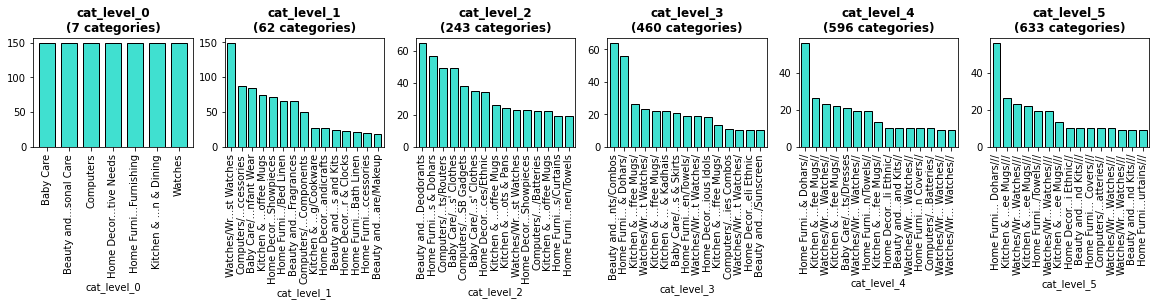

In [16]:
shorten_label = 10
n_first = 15
fig = plt.figure(figsize=(20,2))
for i, col in enumerate(df_cat_level.columns,1):
    # tracé des graphes
    ax = fig.add_subplot(1,len(df_cat_level.columns), i)
    ser = df_cat_level.groupby(col).size().sort_values(ascending=False)
    ser[0:n_first].plot.bar(width=0.75, color='turquoise', ec='k', ax=ax)
    # raccourcissement du nom labels
    thr = int(shorten_label)
    lab_x = [item.get_text() for item in ax.get_xticklabels()]
    short_lab_x = [s[:thr]+'...'+s[-thr:] if len(s)>thr else s for s in lab_x]
    ax.axes.set_xticklabels(short_lab_x)
    # mise en place du titre
    ax.set_title(col+f'\n({ser.shape[0]} categories)', fontweight='bold')

On voit que pour la niveau 0, on a 7 catégories.

In [17]:
df_cat_level['cat_level_0'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

On remplace les noms de catégories à plusieurs mots par un nom à un seul mot:

In [18]:
df_cat_level['category'] = \
    df_cat_level['cat_level_0'].replace({'Home Furnishing': 'Furnishing',
                                         'Baby Care': 'Baby', 
                                         'Watches': 'Watches',
                                         'Home Decor & Festive Needs': 'Decor',
                                         'Kitchen & Dining': 'Kitchen',
                                         'Beauty and Personal Care': 'Beauty',
                                         'Computers': 'Computers'})

On extrait les colonnes qui sont intéressantes:

In [19]:
df_final_cat = pd.concat([df_cat_level['category'],
                         df_flipkart[["uniq_id","product_name", "description"]]], axis=1)

In [20]:
df_final_cat.set_index('uniq_id')

category  \
uniq_id                                        
55b85ea15a1536d46b7190ad6fff8ce7  Furnishing   
7b72c92c2f6c40268628ec5f14c6d590        Baby   
64d5d4a258243731dc7bbb1eef49ad74        Baby   
d4684dcdc759dd9cdf41504698d737d8  Furnishing   
6325b6870c54cd47be6ebfbffa620ec7  Furnishing   
...                                      ...   
958f54f4c46b53c8a0a9b8167d9140bc        Baby   
fd6cbcc22efb6b761bd564c28928483c        Baby   
5912e037d12774bb73a2048f35a00009        Baby   
c3edc504d1b4f0ba6224fa53a43a7ad6        Baby   
f2f027ad6a6df617c9f125173da71e44        Baby   

                                                                       product_name  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...   
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   
...                                                                             ...   
958f54f4c46b53c8a0a9b8167d9140bc     Oren Empower Extra Large Self Adhesive Sticker   
fd6cbcc22efb6b761bd564c28928483c             Wallmantra Large Vinyl Sticker Sticker   
5912e037d12774bb73a2048f35a00009  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
c3edc504d1b4f0ba6224fa53a43a7ad6            Wallmantra Medium Vinyl Sticker Sticker   
f2f027ad6a6df617c9f125173da71e44                       Uberlyfe Large Vinyl Sticker   

                                                                        description  
uniq_id                                                                              
55b85ea15a1536d46b7190ad6fff8ce7  Key Features of Elegance Polyester Multicolor ...  
7b72c92c2f6c40268628ec5f14c6d590  Specifications of Sathiyas Cotton Bath Towel (...  
64d5d4a258243731dc7bbb1eef49ad74  Key Features of Eurospa Cotton Terry Face Towe...  
d4684dcdc759dd9cdf41504698d737d8  Key Features of SANTOSH ROYAL FASHION Cotton P...  
6325b6870c54cd47be6ebfbffa620ec7  Key Features of Jaipur Print Cotton Floral Kin...  
...                                                                             ...  
958f54f4c46b53c8a0a9b8167d9140bc  Oren Empower Extra Large Self Adhesive Sticker...  
fd6cbcc22efb6b761bd564c28928483c  Wallmantra Large Vinyl Sticker Sticker (Pack o...  
5912e037d12774bb73a2048f35a00009  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...  
c3edc504d1b4f0ba6224fa53a43a7ad6  Buy Wallmantra Medium Vinyl Sticker Sticker fo...  
f2f027ad6a6df617c9f125173da71e44  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...  

[1050 rows x 3 columns]

In [21]:
corpus = ' '.join(df_final_cat['description'].values)
print("total nb of words in the whole corpus: ", len(corpus.split()))

total nb of words in the whole corpus:  80013


In [22]:
df_final_cat.shape

(1050, 4)

In [23]:
df_final_cat_P6 = df_final_cat

In [24]:
df_final_cat_P6.to_csv('/Users/moninechan/Documents/Openclassroom/DS/Projet_6/P6_Notebooks/Cleaned_DF/df_final_cat_P6.csv')

On va nettoyer le contenu de la colonne "description" de différentes façons pour la mise en données correspondant aux 4 types de modélisation demandés :<br>
- Comptage simple de mots et Tf-idf (bag-of-words),<br>
- Word2Vec (word/sentence embedding i.e: bag-of-words avec lemmatization),<br>
- BERT (word/sentence embedding avec deep learning),<br>
- USE (word/sentence embedding avec deep learning).<br>

### A - 1.2. Nettoyage du jeu de données

In [25]:
df_final_cat_avec_pre_traitement = df_final_cat.copy()

In [26]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [27]:
df_final_cat_avec_pre_traitement['sentence_bow'] = df_final_cat['description'].apply(lambda x : transform_bow_fct(x))
df_final_cat_avec_pre_traitement['sentence_bow_lem'] = df_final_cat['description'].apply(lambda x : transform_bow_lem_fct(x))
df_final_cat_avec_pre_traitement['sentence_dl'] = df_final_cat['description'].apply(lambda x : transform_dl_fct(x))
df_final_cat_avec_pre_traitement.shape

(1050, 7)

In [28]:
df_final_cat_avec_pre_traitement.head()

category                           uniq_id  \
0  Furnishing  55b85ea15a1536d46b7190ad6fff8ce7   
1        Baby  7b72c92c2f6c40268628ec5f14c6d590   
2        Baby  64d5d4a258243731dc7bbb1eef49ad74   
3  Furnishing  d4684dcdc759dd9cdf41504698d737d8   
4  Furnishing  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                        sentence_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                    sentence_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                         sentence_dl  
0  key features of elegance polyester multicolor ...  
1  specifications of sathiyas cotton bath towel (...  
2  key features of eurospa cotton terry face towe...  
3  key features of santosh royal fashion cotton p...  
4  key features of jaipur print cotton floral kin...

In [29]:
#1er object du dataframe : description
# Texte brut
df_final_cat_avec_pre_traitement.iat[0, 3]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [30]:
#1er object du dataframe : sentence_bow
# Texte brut
#      + tokénization
#      + enlève stop words et ponctuation
#      + passage en miniscule
df_final_cat_avec_pre_traitement.iat[0, 4]

'key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 

In [31]:
#1er object du dataframe : sentence_bow_lem
# Texte brut
#      + tokénization
#      + enlève stop words et ponctuation
#      + lemmatization    
#      + passage en miniscule
df_final_cat_avec_pre_traitement.iat[0, 5]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it feature eyelet style stitch metal ring.it make room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight. specification elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multi

In [32]:
#1er object du dataframe : sentence_dl
# Texte brut
#      + tokénization
#      + passage en miniscule
df_final_cat_avec_pre_traitement.iat[0, 5]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it feature eyelet style stitch metal ring.it make room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal design the surreal attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight. specification elegance polyester multicolor abstract eyelet door curtain 213 height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model duster25 color multi

### A - 1.3. Préparation commune des traitements

In [33]:
df_final_cat_avec_pre_traitement.shape

(1050, 7)

In [34]:
l_cat = sorted(list(set(df_final_cat_avec_pre_traitement['category'])))
print("catégories : ", l_cat)

catégories :  ['Baby', 'Beauty', 'Computers', 'Decor', 'Furnishing', 'Kitchen', 'Watches']


In [35]:
len(df_final_cat_avec_pre_traitement)

1050

In [36]:
y_cat_num = [(l_cat.index(df_final_cat_avec_pre_traitement.iloc[i]['category']) + 1) for i in range(len(df_final_cat_avec_pre_traitement))]

In [37]:
y_cat_num

[5,
 1,
 1,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 4,
 6,
 6,
 5,
 1,
 5,
 1,
 2,
 6,
 6,
 6,
 3,
 6,
 2,
 6,
 3,
 6,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 6,
 6,
 1,
 5,
 6,
 6,
 6,
 5,
 6,
 1,
 1,
 1,
 2,
 2,
 5,
 1,
 4,
 4,
 1,
 1,
 4,
 4,
 6,
 3,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 4,
 4,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 4,
 1,
 6,
 1,
 3,
 4,
 1,
 4,
 3,
 5,
 1,
 3,
 4,
 2,
 2,
 2,
 2,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 4,
 4,
 4,
 6,
 4,
 6,
 4,
 4,
 1,
 4,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 4,
 6,
 4,
 1,
 4,
 4,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 4,
 4,
 6,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 6,


In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize

df_final_cat_avec_pre_traitement['length_bow'] = df_final_cat_avec_pre_traitement['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df_final_cat_avec_pre_traitement['length_bow'].max())
df_final_cat_avec_pre_traitement['length_dl'] = df_final_cat_avec_pre_traitement['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df_final_cat_avec_pre_traitement['length_dl'].max())

max length bow :  379
max length dl :  632


In [39]:
df_final_cat_avec_pre_traitement.head()

category                           uniq_id  \
0  Furnishing  55b85ea15a1536d46b7190ad6fff8ce7   
1        Baby  7b72c92c2f6c40268628ec5f14c6d590   
2        Baby  64d5d4a258243731dc7bbb1eef49ad74   
3  Furnishing  d4684dcdc759dd9cdf41504698d737d8   
4  Furnishing  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                        sentence_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                    sentence_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                         sentence_dl  length_bow  length_dl  
0  key features of elegance polyester multicolor ...         156        248  
1  specifications of sathiyas cotton bath towel (...          63         84  
2  key features of eurospa cotton terry face towe...         158        252  
3  key features of santosh royal fashion cotton p...         114        148  
4  key features of jaipur print cotton floral kin...         156        228

In [40]:
df_final_cat_avec_pre_traitement['real_category_number'] = 0

In [41]:
df_final_cat_avec_pre_traitement.head()

category                           uniq_id  \
0  Furnishing  55b85ea15a1536d46b7190ad6fff8ce7   
1        Baby  7b72c92c2f6c40268628ec5f14c6d590   
2        Baby  64d5d4a258243731dc7bbb1eef49ad74   
3  Furnishing  d4684dcdc759dd9cdf41504698d737d8   
4  Furnishing  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                        sentence_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                    sentence_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                         sentence_dl  length_bow  length_dl  \
0  key features of elegance polyester multicolor ...         156        248   
1  specifications of sathiyas cotton bath towel (...          63         84   
2  key features of eurospa cotton terry face towe...         158        252   
3  key features of santosh royal fashion cotton p...         114        148   
4  key features of jaipur print cotton floral kin...         156        228   

   real_category_number  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [42]:
conditions = [
    (df_final_cat_avec_pre_traitement['category'] == 'Baby'),
    (df_final_cat_avec_pre_traitement['category'] == 'Beauty'),
    (df_final_cat_avec_pre_traitement['category'] == 'Computers'),
    (df_final_cat_avec_pre_traitement['category'] == 'Decor'),
    (df_final_cat_avec_pre_traitement['category'] == 'Furnishing'),
    (df_final_cat_avec_pre_traitement['category'] == 'Kitchen'),
    (df_final_cat_avec_pre_traitement['category'] == 'Watches')
]

values = [1, 2, 3, 4, 5, 6, 7]

df_final_cat_avec_pre_traitement['real_category_number'] = np.select(conditions, values)

In [43]:
df_final_cat_avec_pre_traitement.head()

category                           uniq_id  \
0  Furnishing  55b85ea15a1536d46b7190ad6fff8ce7   
1        Baby  7b72c92c2f6c40268628ec5f14c6d590   
2        Baby  64d5d4a258243731dc7bbb1eef49ad74   
3  Furnishing  d4684dcdc759dd9cdf41504698d737d8   
4  Furnishing  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                        sentence_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                    sentence_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                         sentence_dl  length_bow  length_dl  \
0  key features of elegance polyester multicolor ...         156        248   
1  specifications of sathiyas cotton bath towel (...          63         84   
2  key features of eurospa cotton terry face towe...         158        252   
3  key features of santosh royal fashion cotton p...         114        148   
4  key features of jaipur print cotton floral kin...         156        228   

   real_category_number  
0                     5  
1                     1  
2                     1  
3                     5  
4                     5

#### Paramètres pour l'ACP,  l'ARI et TNSE commun pour tous les modèles :

In [44]:
from sklearn.decomposition import PCA
from sklearn import manifold, decomposition
from sklearn.cluster import KMeans

In [45]:
n_clusters = 7

In [46]:
from sklearn import cluster, metrics

In [47]:
import time
from sklearn import manifold, decomposition

In [48]:
import seaborn as sns

## A - 2. CountVectorizer

### A - 2.1. Extraction des features avec CountVectorizer

In [49]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(df_final_cat_avec_pre_traitement[feat])

cv_transform = cvect.transform(df_final_cat_avec_pre_traitement[feat])  

In [50]:
cv_transform.shape

(1050, 5324)

In [51]:
X_features_cv = cv_transform

In [52]:
X_features_cv

<1050x5324 sparse matrix of type '<class 'numpy.int64'>'
	with 34179 stored elements in Compressed Sparse Row format>

In [53]:
X_features_cv_array = X_features_cv.toarray()

In [54]:
X_features_cv_array.shape

(1050, 5324)

### A - 2.2. Modèle CountVectorizer : Analyse PCA et Clustering avec KMeans

In [55]:
# Choix du nombre de composantes à calculer
n_comp_cv = 800

In [56]:
# Calcul des composantes principales
pca_cv = PCA(n_components=n_comp_cv)
pca_cv.fit(X_features_cv_array)

PCA(n_components=800)

In [57]:
x_cv = pca_cv.transform(X_features_cv_array)

In [58]:
x_cv.shape

(1050, 800)

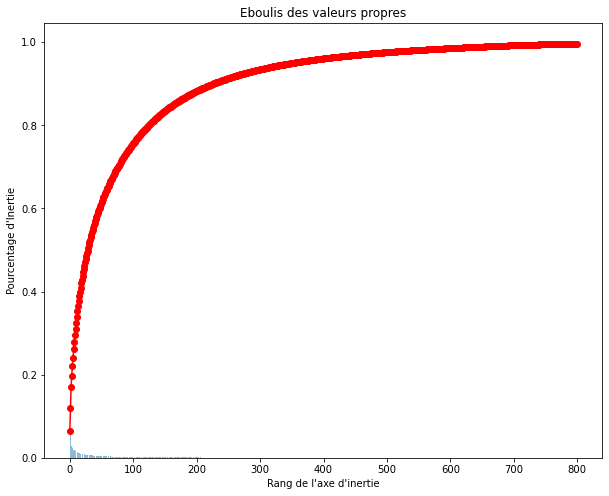

In [59]:
# Eboulis des valeurs propres
exp_var_pca_cv = pca_cv.explained_variance_ratio_

cum_sum_exp_var_pca_cv = np.cumsum(exp_var_pca_cv)

fig = plt.figure(figsize=(10,8))
plt.bar(np.arange(0,len(exp_var_pca_cv),1), exp_var_pca_cv, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(np.arange(0,len(cum_sum_exp_var_pca_cv),1),cum_sum_exp_var_pca_cv, c="red", marker='o')
plt.ylabel("Pourcentage d'Inertie")
plt.xlabel("Rang de l'axe d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [60]:
# On effectue le clustering des features
kmeans_cv = KMeans(n_clusters=7, random_state=22)
kmeans_cv.fit(x_cv)

KMeans(n_clusters=7, random_state=22)

In [61]:
x_cv.shape

(1050, 800)

In [62]:
#prédiction des labels de clusters
labels_cv = kmeans_cv.fit_predict(x_cv)

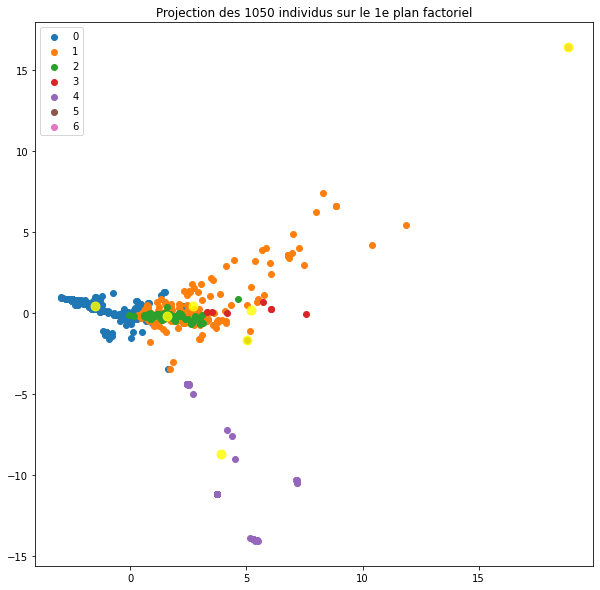

In [423]:
#Récupération des labels
u_labels_cv = np.unique(labels_cv)
centroids_cv = kmeans_cv.cluster_centers_

#Représentation graphique:
plt.figure(figsize=(10,10))
for i in u_labels_cv:
    plt.scatter(x_cv[labels_cv == i , 0] , x_cv[labels_cv == i , 1] , label = i)
    plt.scatter(centroids_cv[i,0], centroids_cv[i,1], s = 80, alpha = 0.8, color = 'yellow')
plt.legend()
plt.title("Projection des {} individus sur le 1e plan factoriel".format(x_cv.shape[0]))
plt.show(block=False)

### A - 2.3. Modèle CountVectorizer : Calcul de l'ARI

In [64]:
df_cv_for_ARI = pd.DataFrame()

In [65]:
df_cv_for_ARI ['labels_predicted_cv_clustering'] = labels_cv

In [66]:
df_cv_for_ARI ['labels_real_categories'] = df_final_cat_avec_pre_traitement['real_category_number']

In [67]:
df_cv_for_ARI.head()

labels_predicted_cv_clustering  labels_real_categories
0                               1                       5
1                               1                       1
2                               1                       1
3                               3                       5
4                               3                       5

In [68]:
original_labels_text = df_cv_for_ARI ['labels_real_categories']

In [69]:
print("ARI : ", metrics.adjusted_rand_score(original_labels_text, labels_cv))

ARI :  0.054806582333970844


### A - 2.4. Modèle avec CountVectorizer : Représentation t-SNE selon les catégories réelles et selon les clusters

In [70]:
tsne_cv = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_cv = tsne_cv.fit_transform(x_cv)

In [71]:
df_tsne_cv = pd.DataFrame(X_tsne_cv[:,0:2], columns=['tsne1', 'tsne2'])

In [72]:
df_tsne_cv['labels_predicted_cv_clustering'] = df_cv_for_ARI ['labels_predicted_cv_clustering'] 

In [73]:
df_tsne_cv['labels_real_categories'] = df_cv_for_ARI ['labels_real_categories'] 

In [74]:
df_tsne_cv['category'] = df_final_cat_avec_pre_traitement['category'] 

In [75]:
df_tsne_cv.head()

tsne1      tsne2  labels_predicted_cv_clustering  \
0 -19.760708 -24.960831                               1   
1  -4.706226 -22.734928                               1   
2  -2.682424 -24.384809                               1   
3 -10.588303 -37.737251                               3   
4 -11.134308 -37.447361                               3   

   labels_real_categories    category  
0                       5  Furnishing  
1                       1        Baby  
2                       1        Baby  
3                       5  Furnishing  
4                       5  Furnishing

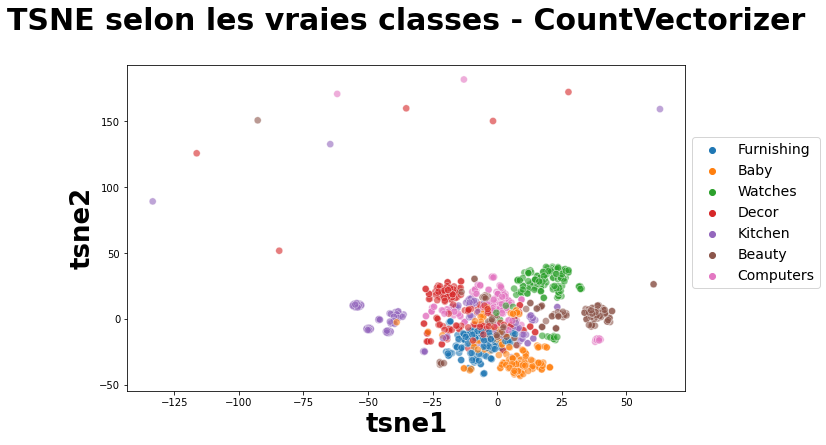

In [76]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="category", data=df_tsne_cv, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les vraies classes - CountVectorizer', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

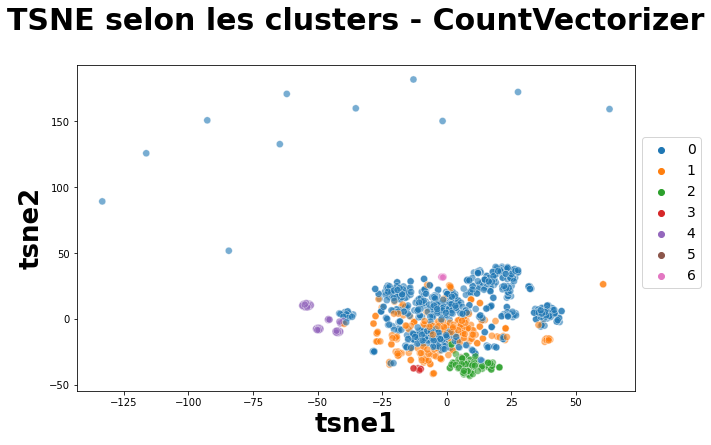

In [77]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels_predicted_cv_clustering", data=df_tsne_cv, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les clusters - CountVectorizer', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

## A - 3. Tf-idf

### A - 3.1. Extraction des features avec Tf-idf

In [78]:
# création du bag of words (Tf-idf)

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'sentence_bow_lem'
tfidf_fit = tfidf.fit(df_final_cat_avec_pre_traitement[feat])

tfidf_transform = tfidf.transform(df_final_cat_avec_pre_traitement[feat])  

In [79]:
tfidf_transform.shape

(1050, 5324)

In [80]:
X_features_tfidf = tfidf_transform

In [81]:
X_features_tfidf

<1050x5324 sparse matrix of type '<class 'numpy.float64'>'
	with 34179 stored elements in Compressed Sparse Row format>

In [82]:
X_features_tfidf_array = X_features_tfidf.toarray()

In [83]:
X_features_tfidf_array.shape

(1050, 5324)

### A - 3.2. Modèle Tfidf : Analyse PCA et Clustering avec KMeans

In [84]:
# Choix du nombre de composantes à calculer
n_comp_tfidf = 800

In [85]:
# Calcul des composantes principales
pca_tfidf = PCA(n_components=n_comp_tfidf)
pca_tfidf.fit(X_features_tfidf_array)

PCA(n_components=800)

In [86]:
x_tfidf = pca_tfidf.transform(X_features_tfidf_array)

In [87]:
x_tfidf.shape

(1050, 800)

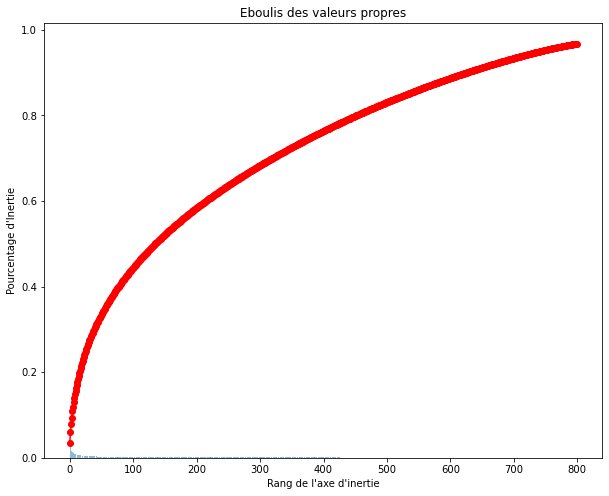

In [88]:
# Eboulis des valeurs propres
exp_var_pca_tfidf = pca_tfidf.explained_variance_ratio_

cum_sum_exp_var_pca_tfidf = np.cumsum(exp_var_pca_tfidf)

fig = plt.figure(figsize=(10,8))
plt.bar(np.arange(0,len(exp_var_pca_tfidf),1), exp_var_pca_tfidf, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(np.arange(0,len(cum_sum_exp_var_pca_tfidf),1),cum_sum_exp_var_pca_tfidf, c="red", marker='o')
plt.ylabel("Pourcentage d'Inertie")
plt.xlabel("Rang de l'axe d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [89]:
# On effectue le clustering des features
kmeans_tfidf = KMeans(n_clusters=7, random_state=22)
kmeans_tfidf.fit(x_tfidf)

KMeans(n_clusters=7, random_state=22)

In [90]:
x_tfidf.shape

(1050, 800)

In [91]:
#prédiction des labels de clusters
labels_tfidf = kmeans_tfidf.fit_predict(x_tfidf)

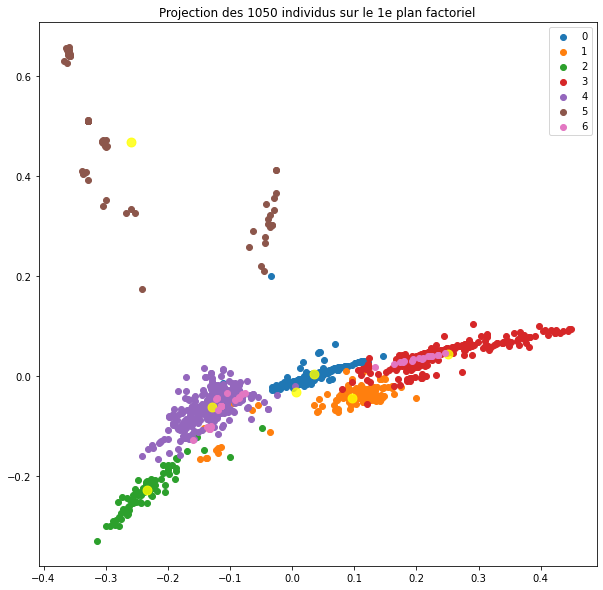

In [431]:
#Récupération des labels
u_labels_tfidf = np.unique(labels_tfidf)
centroids_tfidf = kmeans_tfidf.cluster_centers_

#Représentation graphique:
plt.figure(figsize=(10,10))
for i in u_labels_tfidf:
    plt.scatter(x_tfidf[labels_tfidf == i , 0] , x_tfidf[labels_tfidf == i , 1] , label = i)
    plt.scatter(centroids_tfidf[i,0], centroids_tfidf[i,1], s = 80, alpha = 0.8, color = 'yellow')
plt.legend()
plt.title("Projection des {} individus sur le 1e plan factoriel".format(x_tfidf.shape[0]))
plt.show(block=False)

### A - 3.3. Modèle Tf-idf : Calcul de l'ARI

In [93]:
df_tfidf_for_ARI = pd.DataFrame()

In [94]:
df_tfidf_for_ARI ['labels_predicted_tfidf_clustering'] = labels_tfidf

In [95]:
df_tfidf_for_ARI ['labels_real_categories'] = df_final_cat_avec_pre_traitement['real_category_number']

In [96]:
df_tfidf_for_ARI.head()

labels_predicted_tfidf_clustering  labels_real_categories
0                                  4                       5
1                                  4                       1
2                                  4                       1
3                                  4                       5
4                                  4                       5

In [97]:
original_labels_text = df_tfidf_for_ARI ['labels_real_categories']

In [98]:
print("ARI : ", metrics.adjusted_rand_score(original_labels_text, labels_tfidf))

ARI :  0.2866240618740656


### A - 3.4. Modèle avec Tfidf : Représentation t-SNE selon les catégories réelles et selon les clusters


In [99]:
tsne_tfidf = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_tfidf = tsne_tfidf.fit_transform(x_tfidf)

In [100]:
df_tsne_tfidf = pd.DataFrame(X_tsne_tfidf[:,0:2], columns=['tsne1', 'tsne2'])

In [101]:
df_tsne_tfidf['labels_predicted_tfidf_clustering'] = df_tfidf_for_ARI ['labels_predicted_tfidf_clustering'] 

In [102]:
df_tsne_tfidf['labels_real_categories'] = df_tfidf_for_ARI ['labels_real_categories'] 

In [103]:
df_tsne_tfidf['category'] = df_final_cat_avec_pre_traitement['category']

In [104]:
df_tsne_tfidf.head()

tsne1      tsne2  labels_predicted_tfidf_clustering  \
0 -21.096720  -7.944407                                  4   
1  -2.792026 -25.163595                                  4   
2  -2.263791 -23.136278                                  4   
3 -13.676355   2.778805                                  4   
4 -13.152704   2.460728                                  4   

   labels_real_categories    category  
0                       5  Furnishing  
1                       1        Baby  
2                       1        Baby  
3                       5  Furnishing  
4                       5  Furnishing

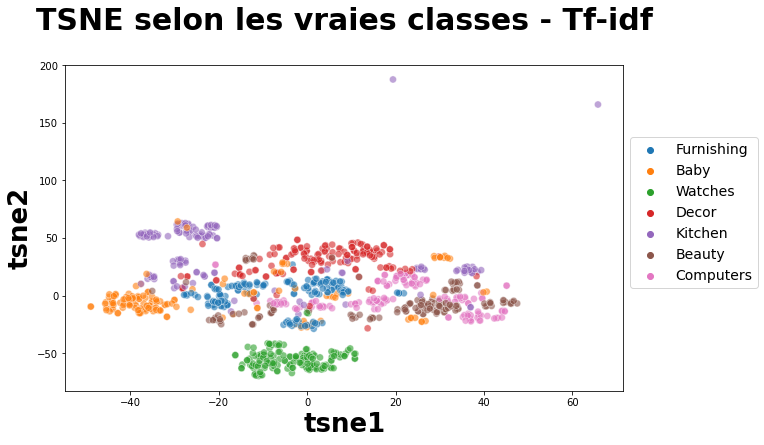

In [105]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="category", data=df_tsne_tfidf, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les vraies classes - Tf-idf', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

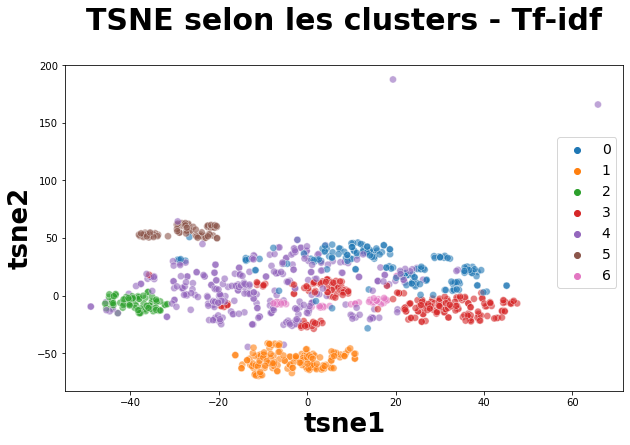

In [106]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels_predicted_tfidf_clustering", data=df_tsne_tfidf, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les clusters - Tf-idf', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

## A - 4. Word2Vec

### A - 4.1. Extraction des features avec Word2Vec

In [107]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

#### Création du modèle Word2Vec

In [108]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24
sentences = df_final_cat_avec_pre_traitement['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [109]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


In [110]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


#### Création de la matrice d'embedding

In [111]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


#### Création du modèle d'embedding

In [112]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1413900   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


#### Exécution du modèle

In [113]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 2ms/step


(1050, 300)

In [114]:
embeddings.shape

(1050, 300)

In [115]:
type(embeddings)

numpy.ndarray

In [116]:
embeddings[0].shape

(300,)

In [117]:
X_features_w2v = embeddings

In [118]:
X_features_w2v.shape

(1050, 300)

In [119]:
type(X_features_w2v)

numpy.ndarray

### A - 4.2. Modèle Word2Vec : Analyse PCA et Clustering avec KMeans

In [120]:
# Choix du nombre de composantes à calculer
n_comp_w2v = 50

In [121]:
# Calcul des composantes principales
pca_w2v = PCA(n_components=n_comp_w2v)
pca_w2v.fit(X_features_w2v)

PCA(n_components=50)

In [122]:
x_w2v = pca_w2v.transform(X_features_w2v)

In [123]:
x_w2v.shape

(1050, 50)

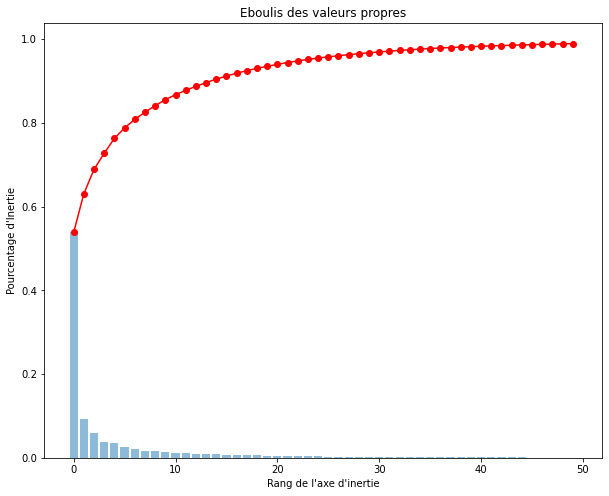

In [124]:
# Eboulis des valeurs propres
exp_var_pca_w2v = pca_w2v.explained_variance_ratio_

cum_sum_exp_var_pca_w2v = np.cumsum(exp_var_pca_w2v)

fig = plt.figure(figsize=(10,8))
plt.bar(np.arange(0,len(exp_var_pca_w2v),1), exp_var_pca_w2v, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(np.arange(0,len(cum_sum_exp_var_pca_w2v),1),cum_sum_exp_var_pca_w2v, c="red", marker='o')
plt.ylabel("Pourcentage d'Inertie")
plt.xlabel("Rang de l'axe d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [125]:
# On effectue le clustering des features
kmeans_w2v = KMeans(n_clusters=7, random_state=22)
kmeans_w2v.fit(x_w2v)

KMeans(n_clusters=7, random_state=22)

In [126]:
x_w2v.shape

(1050, 50)

In [127]:
#prédiction des labels de clusters
labels_w2v = kmeans_w2v.fit_predict(x_w2v)

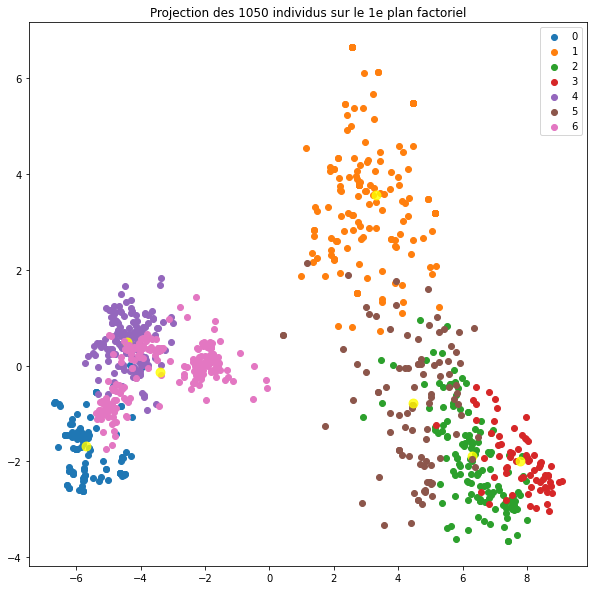

In [128]:
#Récupération des labels
u_labels_w2v = np.unique(labels_w2v)
centroids_w2v = kmeans_w2v.cluster_centers_

#Représentation graphique:
plt.figure(figsize=(10,10))
for i in u_labels_w2v:
    plt.scatter(x_w2v[labels_w2v == i , 0] , x_w2v[labels_w2v == i , 1] , label = i)
    plt.scatter(centroids_w2v[i,0], centroids_w2v[i,1], s = 80, alpha = 0.8, color = 'yellow')
plt.legend()
plt.title("Projection des {} individus sur le 1e plan factoriel".format(x_w2v.shape[0]))
plt.show(block=False)

### A - 4.3. Modèle Word2Vec : Calcul de l'ARI

In [129]:
df_w2v_for_ARI = pd.DataFrame()

In [130]:
df_w2v_for_ARI ['labels_predicted_w2v_clustering'] = labels_w2v

In [131]:
df_w2v_for_ARI ['labels_real_categories'] = df_final_cat_avec_pre_traitement['real_category_number']

In [132]:
df_w2v_for_ARI.head()

labels_predicted_w2v_clustering  labels_real_categories
0                                2                       5
1                                2                       1
2                                2                       1
3                                2                       5
4                                2                       5

In [133]:
original_labels_text = df_w2v_for_ARI ['labels_real_categories']

In [134]:
print("ARI : ", metrics.adjusted_rand_score(original_labels_text, labels_w2v))

ARI :  0.25077561666119613


### A - 4.4. Modèle avec Word2Vec : Représentation t-SNE selon les catégories réelles et selon les clusters

In [135]:
tsne_w2v = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_w2v = tsne_w2v.fit_transform(x_w2v)

In [136]:
df_tsne_w2v = pd.DataFrame(X_tsne_w2v[:,0:2], columns=['tsne1', 'tsne2'])

In [137]:
df_tsne_w2v['labels_predicted_w2v_clustering'] = df_w2v_for_ARI ['labels_predicted_w2v_clustering'] 

In [138]:
df_tsne_w2v['category'] = df_final_cat_avec_pre_traitement['category']

In [139]:
df_tsne_w2v['labels_real_categories'] = df_w2v_for_ARI ['labels_real_categories'] 

In [140]:
df_tsne_w2v.head()

tsne1      tsne2  labels_predicted_w2v_clustering    category  \
0  31.656107  31.662294                                2  Furnishing   
1  28.738941  30.040956                                2        Baby   
2  28.862230  29.926142                                2        Baby   
3  27.087868  35.635513                                2  Furnishing   
4  27.110615  35.731724                                2  Furnishing   

   labels_real_categories  
0                       5  
1                       1  
2                       1  
3                       5  
4                       5

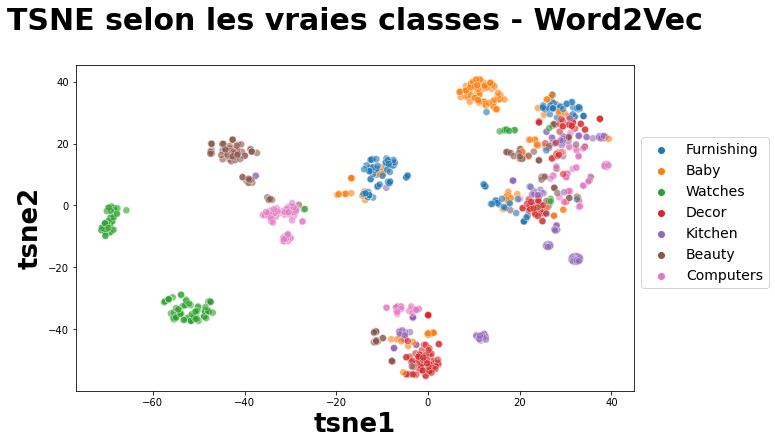

In [141]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="category", data=df_tsne_w2v, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les vraies classes - Word2Vec', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

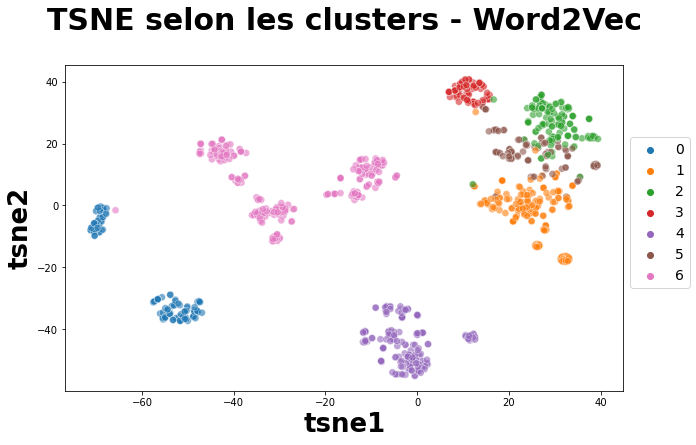

In [142]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels_predicted_w2v_clustering", data=df_tsne_w2v, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les clusters - Word2Vec', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

## A - 5. BERT

### A - 5.1. Extraction des features avec BERT

In [143]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [144]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
False


#### Fonctions communes

In [145]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

#### BERT HuggingFace

#### 'bert-base-uncased'

In [146]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df_final_cat_avec_pre_traitement['sentence_dl'].to_list()

In [147]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 3s 3s/step
temps traitement :  366.0


In [148]:
X_features_bert = features_bert

In [149]:
X_features_bert.shape

(1050, 768)

In [150]:
type(X_features_bert)

numpy.ndarray

### A - 5.2. Modèle BERT : Analyse PCA et Clustering avec KMeans

In [151]:
# Choix du nombre de composantes à calculer
n_comp_bert = 200

In [152]:
# Calcul des composantes principales
pca_bert = PCA(n_components=n_comp_bert)
pca_bert.fit(X_features_bert)

PCA(n_components=200)

In [153]:
x_bert = pca_bert.transform(X_features_bert)

In [154]:
x_bert.shape

(1050, 200)

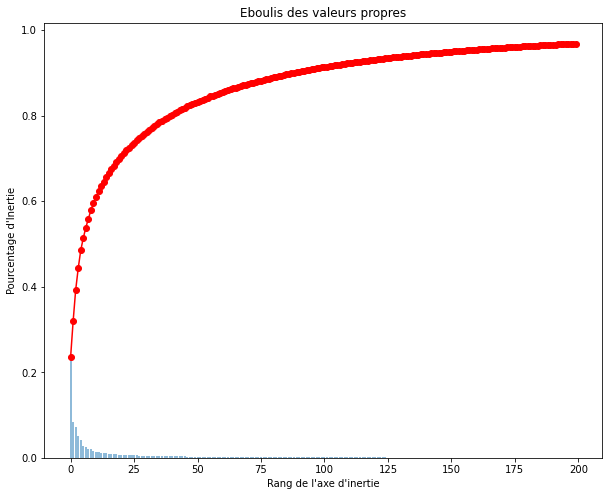

In [155]:
# Eboulis des valeurs propres
exp_var_pca_bert = pca_bert.explained_variance_ratio_

cum_sum_exp_var_pca_bert = np.cumsum(exp_var_pca_bert)

fig = plt.figure(figsize=(10,8))
plt.bar(np.arange(0,len(exp_var_pca_bert),1), exp_var_pca_bert, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(np.arange(0,len(cum_sum_exp_var_pca_bert),1),cum_sum_exp_var_pca_bert, c="red", marker='o')
plt.ylabel("Pourcentage d'Inertie")
plt.xlabel("Rang de l'axe d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [156]:
# On effectue le clustering des features
kmeans_bert = KMeans(n_clusters=7, random_state=22)
kmeans_bert.fit(x_bert)

KMeans(n_clusters=7, random_state=22)

In [157]:
x_bert.shape

(1050, 200)

In [158]:
#prédiction des labels de clusters
labels_bert = kmeans_bert.fit_predict(x_bert)

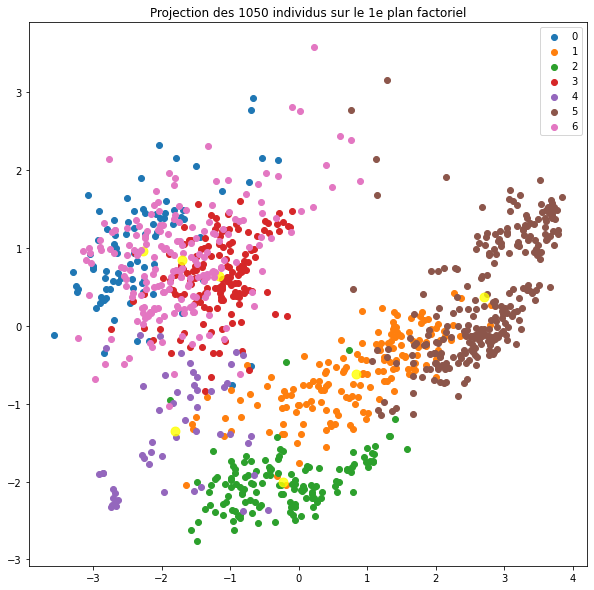

In [159]:
#Récupération des labels
u_labels_bert = np.unique(labels_bert)
centroids_bert = kmeans_bert.cluster_centers_

#Représentation graphique:
plt.figure(figsize=(10,10))
for i in u_labels_bert:
    plt.scatter(x_bert[labels_bert == i , 0] , x_bert[labels_bert == i , 1] , label = i)
    plt.scatter(centroids_bert[i,0], centroids_bert[i,1], s = 80, alpha = 0.8, color = 'yellow')
plt.legend()
plt.title("Projection des {} individus sur le 1e plan factoriel".format(x_bert.shape[0]))
plt.show(block=False)

### A - 5.3. Modèle BERT : Calcul de l'ARI

In [160]:
df_bert_for_ARI = pd.DataFrame()

In [161]:
df_bert_for_ARI ['labels_predicted_bert_clustering'] = labels_bert

In [162]:
df_bert_for_ARI ['labels_real_categories'] = df_final_cat_avec_pre_traitement['real_category_number']

In [163]:
df_bert_for_ARI.head()

labels_predicted_bert_clustering  labels_real_categories
0                                 6                       5
1                                 6                       1
2                                 6                       1
3                                 0                       5
4                                 0                       5

In [164]:
original_labels_text = df_bert_for_ARI ['labels_real_categories']

In [165]:
print("ARI : ", metrics.adjusted_rand_score(original_labels_text, labels_bert))

ARI :  0.2678381099454752


### A - 5.4. Modèle avec BERT : Représentation t-SNE selon les catégories réelles et selon les clusters

In [166]:
tsne_bert = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_bert = tsne_bert.fit_transform(x_bert)

In [167]:
df_tsne_bert = pd.DataFrame(X_tsne_bert[:,0:2], columns=['tsne1', 'tsne2'])

In [168]:
df_tsne_bert['labels_predicted_bert_clustering'] = df_bert_for_ARI ['labels_predicted_bert_clustering'] 

In [169]:
df_tsne_bert['category'] = df_final_cat_avec_pre_traitement['category']

In [170]:
df_tsne_bert['labels_real_categories'] = df_bert_for_ARI ['labels_real_categories'] 

In [171]:
df_tsne_bert.head()

tsne1      tsne2  labels_predicted_bert_clustering    category  \
0  19.705223  23.804611                                 6  Furnishing   
1  12.435355  21.375378                                 6        Baby   
2  13.334053  21.696365                                 6        Baby   
3  14.841389  29.315977                                 0  Furnishing   
4  18.510742  28.027735                                 0  Furnishing   

   labels_real_categories  
0                       5  
1                       1  
2                       1  
3                       5  
4                       5

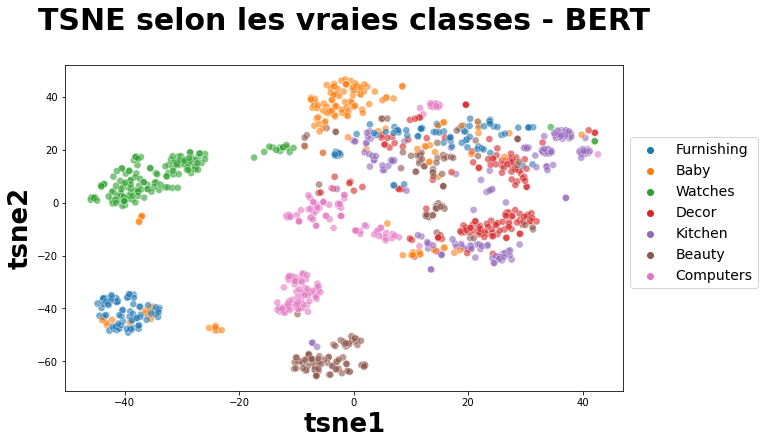

In [172]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="category", data=df_tsne_bert, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les vraies classes - BERT', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

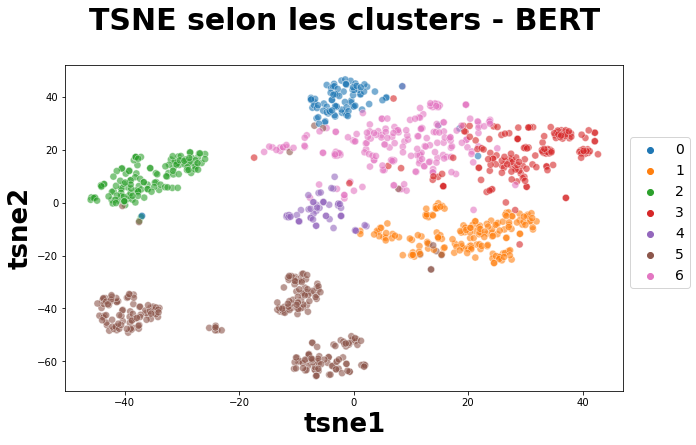

In [173]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels_predicted_bert_clustering", data=df_tsne_bert, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les clusters - BERT', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

## A - 6. USE

### A - 6.1. Extraction des features avec USE

In [174]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [175]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
False


In [176]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [177]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [178]:
batch_size = 10
sentences_USE = df_final_cat_avec_pre_traitement['sentence_dl'].to_list()

In [179]:
features_USE = feature_USE_fct(sentences_USE, batch_size)

In [180]:
X_features_USE = features_USE

In [181]:
X_features_USE.shape

(1050, 512)

In [182]:
type(X_features_USE)

numpy.ndarray

### A - 6.2. Modèle USE : Analyse PCA et Clustering avec KMeans

In [183]:
# Choix du nombre de composantes à calculer
n_comp_USE = 300

In [184]:
# Calcul des composantes principales
pca_USE = PCA(n_components=n_comp_USE)
pca_USE.fit(X_features_USE)

PCA(n_components=300)

In [185]:
x_USE = pca_USE.transform(X_features_USE)

In [186]:
x_USE.shape

(1050, 300)

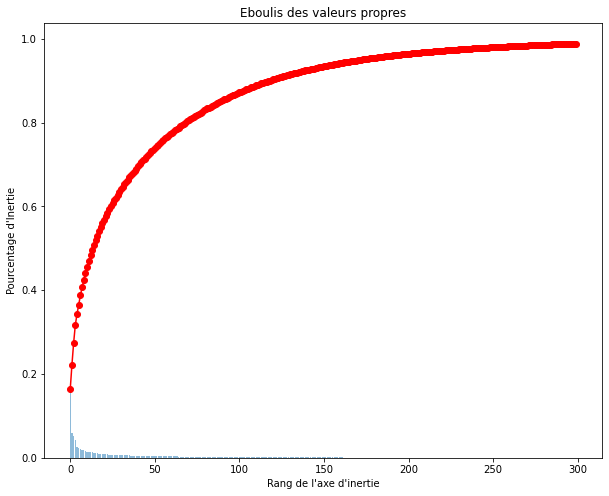

In [187]:
# Eboulis des valeurs propres
exp_var_pca_USE = pca_USE.explained_variance_ratio_

cum_sum_exp_var_pca_USE = np.cumsum(exp_var_pca_USE)

fig = plt.figure(figsize=(10,8))
plt.bar(np.arange(0,len(exp_var_pca_USE),1), exp_var_pca_USE, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(np.arange(0,len(cum_sum_exp_var_pca_USE),1),cum_sum_exp_var_pca_USE, c="red", marker='o')
plt.ylabel("Pourcentage d'Inertie")
plt.xlabel("Rang de l'axe d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [188]:
# On effectue le clustering des features
kmeans_USE = KMeans(n_clusters=7, random_state=22)
kmeans_USE.fit(x_USE)

KMeans(n_clusters=7, random_state=22)

In [189]:
x_USE.shape

(1050, 300)

In [190]:
#prédiction des labels de clusters
labels_USE = kmeans_USE.fit_predict(x_USE)

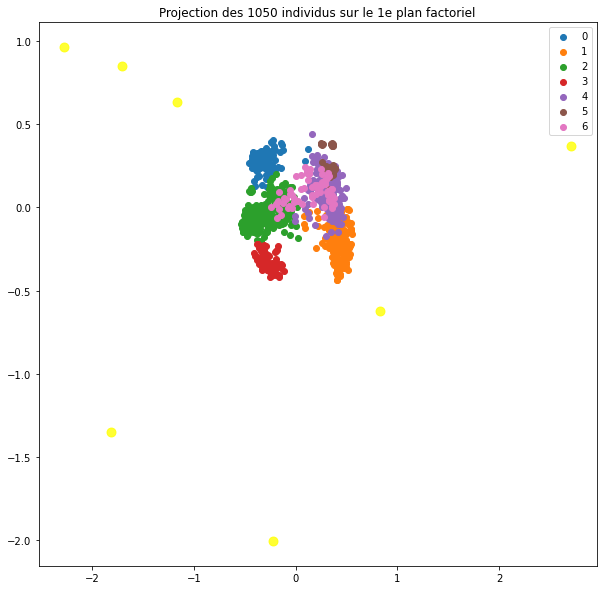

In [191]:
#Récupération des labels
u_labels_USE = np.unique(labels_USE)
centroids_USE = kmeans_bert.cluster_centers_

#Représentation graphique:
plt.figure(figsize=(10,10))
for i in u_labels_USE:
    plt.scatter(x_USE[labels_USE == i , 0] , x_USE[labels_USE == i , 1] , label = i)
    plt.scatter(centroids_USE[i,0], centroids_USE[i,1], s = 80, alpha = 0.8, color = 'yellow')
plt.legend()
plt.title("Projection des {} individus sur le 1e plan factoriel".format(x_USE.shape[0]))
plt.show(block=False)

### A - 6.3. Modèle USE : Calcul de l'ARI

In [192]:
df_USE_for_ARI = pd.DataFrame()

In [193]:
df_USE_for_ARI ['labels_predicted_USE_clustering'] = labels_USE

In [194]:
df_USE_for_ARI ['labels_real_categories'] = df_final_cat_avec_pre_traitement['real_category_number']

In [195]:
df_USE_for_ARI.head()

labels_predicted_USE_clustering  labels_real_categories
0                                1                       5
1                                1                       1
2                                1                       1
3                                1                       5
4                                1                       5

In [196]:
original_labels_text = df_USE_for_ARI ['labels_real_categories']

In [197]:
print("ARI : ", metrics.adjusted_rand_score(original_labels_text, labels_USE))

ARI :  0.3323656706641978


### A - 6.4. Modèle avec USE : Représentation t-SNE selon les catégories réelles et selon les clusters

In [198]:
tsne_USE = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_USE = tsne_USE.fit_transform(x_USE)

In [199]:
df_tsne_USE = pd.DataFrame(X_tsne_USE[:,0:2], columns=['tsne1', 'tsne2'])

In [200]:
df_tsne_USE['labels_predicted_USE_clustering'] = df_USE_for_ARI ['labels_predicted_USE_clustering'] 

In [201]:
df_tsne_USE['category'] = df_final_cat_avec_pre_traitement['category']

In [202]:
df_tsne_USE['labels_real_categories'] = df_USE_for_ARI ['labels_real_categories'] 

In [203]:
df_tsne_USE.head()

tsne1      tsne2  labels_predicted_USE_clustering    category  \
0  -9.088030 -42.721634                                1  Furnishing   
1 -12.170086 -33.040337                                1        Baby   
2 -12.616936 -32.880283                                1        Baby   
3  -6.899047 -37.125000                                1  Furnishing   
4  -7.386045 -37.373619                                1  Furnishing   

   labels_real_categories  
0                       5  
1                       1  
2                       1  
3                       5  
4                       5

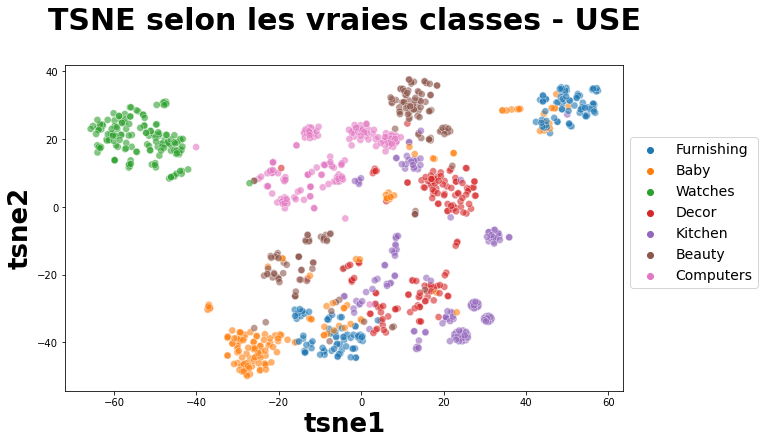

In [204]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="category", data=df_tsne_USE, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les vraies classes - USE', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

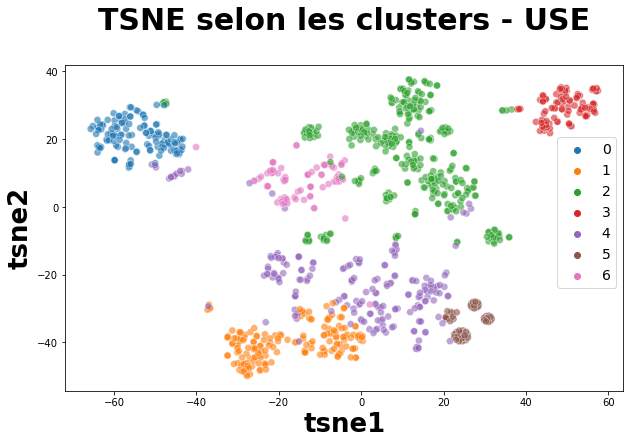

In [205]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels_predicted_USE_clustering", data=df_tsne_USE, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les clusters - USE', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()





# B - Images

## B - 1. SIFT

### B - 1.0. Préparation des données

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

path = "/Users/moninechan/Documents/Openclassroom/DS/Projet_6/P6_Notebooks/data/Images_redo/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [207]:
data = pd.read_csv('/Users/moninechan/Documents/Openclassroom/DS/Projet_6/P6_Notebooks/Cleaned_DF/df_final_cat_P6.csv')

In [208]:
data = data.drop('Unnamed: 0', 1)

In [209]:
data.head()

category                           uniq_id  \
0  Furnishing  55b85ea15a1536d46b7190ad6fff8ce7   
1        Baby  7b72c92c2f6c40268628ec5f14c6d590   
2        Baby  64d5d4a258243731dc7bbb1eef49ad74   
3  Furnishing  d4684dcdc759dd9cdf41504698d737d8   
4  Furnishing  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  
0  Key Features of Elegance Polyester Multicolor ...  
1  Specifications of Sathiyas Cotton Bath Towel (...  
2  Key Features of Eurospa Cotton Terry Face Towe...  
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  
4  Key Features of Jaipur Print Cotton Floral Kin...

In [210]:
data['image_path'] = data['uniq_id'] +'.jpg'

In [211]:
data.head()

category                           uniq_id  \
0  Furnishing  55b85ea15a1536d46b7190ad6fff8ce7   
1        Baby  7b72c92c2f6c40268628ec5f14c6d590   
2        Baby  64d5d4a258243731dc7bbb1eef49ad74   
3  Furnishing  d4684dcdc759dd9cdf41504698d737d8   
4  Furnishing  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                             image_path  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

In [212]:
list_category = sorted(pd.unique(data['category']).tolist())

In [213]:
list_category

['Baby', 'Beauty', 'Computers', 'Decor', 'Furnishing', 'Kitchen', 'Watches']

In [214]:
from matplotlib.image import imread

In [215]:
def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["category"][i]==name]
    return list_image_name

In [216]:
list_Baby=[data['image_path'][i] for i in range(len(data)) if data["category"][i]== 'Baby']

In [217]:
data.loc[data['image_path'] == '7b72c92c2f6c40268628ec5f14c6d590.jpg']

category                           uniq_id                product_name  \
1     Baby  7b72c92c2f6c40268628ec5f14c6d590  Sathiyas Cotton Bath Towel   

                                         description  \
1  Specifications of Sathiyas Cotton Bath Towel (...   

                             image_path  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg

In [218]:
list_Baby

['7b72c92c2f6c40268628ec5f14c6d590.jpg',
 '64d5d4a258243731dc7bbb1eef49ad74.jpg',
 '90e56526f4c5892beac49f262b85150a.jpg',
 '5325213d84c80ad310b6e4b37a1ac824.jpg',
 'f4e7f269319ba9cf5507a9e2febacbf5.jpg',
 '903d63e2b71d692ccd628e1de516516e.jpg',
 '141d2b743c477043041faddf9233c8ad.jpg',
 '7a3f11f380a1bf85338ab3771ff81e9f.jpg',
 'ae45b64d808a883aa35f2bf4de879cac.jpg',
 '320833ab08c9a94ef83520612899a85f.jpg',
 '601817defaff9d0e30e1b72f96d3975f.jpg',
 '3cdfd9df09f61a8fd178bafcc8dbed31.jpg',
 '184ecf07ca4e2872eaf53d2344a1e783.jpg',
 'f1ee63a5f0db853e2c1b377778580d39.jpg',
 '8015db34d09642b046c775e8157dd729.jpg',
 'bc784846bd59a16832454416ac708003.jpg',
 'be09f5a3a88ac10ae14c791fc8ac0dae.jpg',
 '7dd5e83e2108a97659577e50879f9d9f.jpg',
 '70578f48cc96bbb60d040e08025e521d.jpg',
 '32cf0691248297655e2c1728b12e2262.jpg',
 '719677b02bfccafb86e9be78f36f938b.jpg',
 'a8ea6fc2b3cd95f46bced80853ce8e0e.jpg',
 '7f7c64d439d64656d6baa40f5798cdf5.jpg',
 '8876d7569efdaff5a21b33a1ab44a13d.jpg',
 '7c15895bbfd7da

In [219]:
list_Beauty=[data['image_path'][i] for i in range(len(data)) if data["category"][i]== 'Beauty']

In [220]:
list_Computers=[data['image_path'][i] for i in range(len(data)) if data["category"][i]== 'Computers']
list_Decor=[data['image_path'][i] for i in range(len(data)) if data["category"][i]== 'Decor']
list_Furnishing=[data['image_path'][i] for i in range(len(data)) if data["category"][i]== 'Furnishing']
list_Kitchen=[data['image_path'][i] for i in range(len(data)) if data["category"][i]== 'Kitchen']
list_Watches=[data['image_path'][i] for i in range(len(data)) if data["category"][i]== 'Watches']

In [221]:
list_of_list_category = [
    list_Baby,
    list_Beauty,
    list_Computers,
    list_Decor,
    list_Furnishing,
    list_Kitchen,
    list_Watches
]

Baby
-------



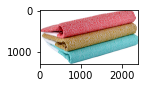

['Sathiyas Cotton Bath Towel']


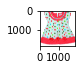

["Pokizo Baby Girl's A-line Dress"]


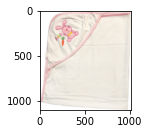

['Offspring Embroidered, Solid Single Wrapper White, Pink']




Beauty
-------



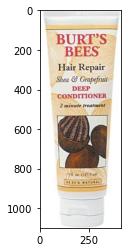

['Burt s Bees Hair Repair Shea And Grapefruit Deep Conditioner']


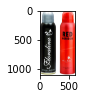

['Anna Andre Paris Floralina & Red Horizon Combo Set']


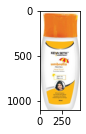

['Keya Seth Umbrella Protex Heat Proof Sunscreen Solution - SPF 75 PA+++']




Computers
-------



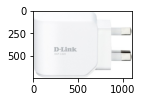

['D-Link DAP1320']


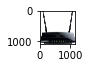

['TP-LINK TD-W8970']


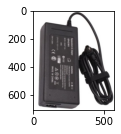

['Lapguard SONY VAIO VGN-NW270DB_90 90 Adapter']




Decor
-------



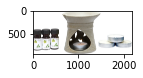

['Myesquire Ceramic Burner Pot Lemongrass Liquid Air Freshener']


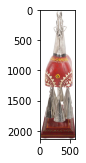

['Lal Haveli Beautifully crafted and painted Horse with bells Showpiece  -  33 cm']


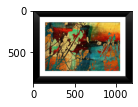

['Wallmantra Abstract Colors Modern Art Wall Hanging Canvas Painting']




Furnishing
-------



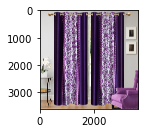

['Elegance Polyester Multicolor Abstract Eyelet Door Curtain']


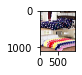

['Home Originals Polka, Abstract Double Blanket Multicolor']


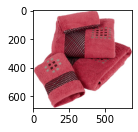

['Maspar Cotton Set of Towels']




Kitchen
-------



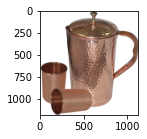

['Dungri India Craft Ducjug010-ducgl012-2 Jug Glass Set']


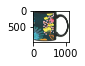

['Printland PMBA1310 Ceramic Mug']


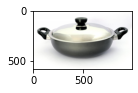

['Metallino Kadhai NA L']




Watches
-------



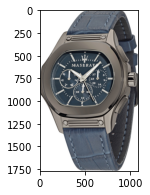

['Maserati Time R8851116001 Analog Watch  - For Boys']


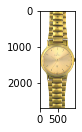

['Maxima 04615CMGY Gold Analog Watch  - For Men']


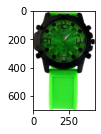

['Gift Island SW13388E Fashionin Digital Watch  - For Men']






In [222]:
for i in range(0,len(list_category)) :
    print(list_category[i])
    print("-------\n")
    for j in range(0,149,50):
        plt.subplot(130 + 1 + j)
        filename = path+list_of_list_category[i][j]
        image = imread(filename)
        plt.imshow(image)
        plt.show()
        extract_uniq_id = list_of_list_category[i][j].replace(".jpg","")
        print(data.loc[data['uniq_id'] == extract_uniq_id]['product_name'].values)
    print("\n\n\n")

In [223]:
data.head()

category                           uniq_id  \
0  Furnishing  55b85ea15a1536d46b7190ad6fff8ce7   
1        Baby  7b72c92c2f6c40268628ec5f14c6d590   
2        Baby  64d5d4a258243731dc7bbb1eef49ad74   
3  Furnishing  d4684dcdc759dd9cdf41504698d737d8   
4  Furnishing  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                             image_path  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

In [224]:
data.to_csv('data.csv')

### B - 1.1. Extraction des features aves SIFT

original image:


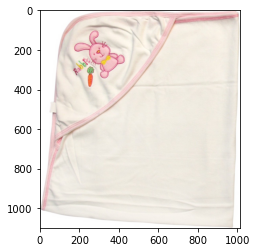

image after cv2.imread:


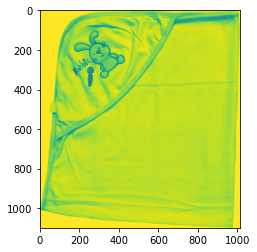

image after histogram is equalized:


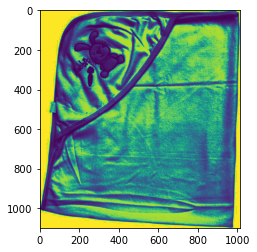

image with SIFT descriptors:


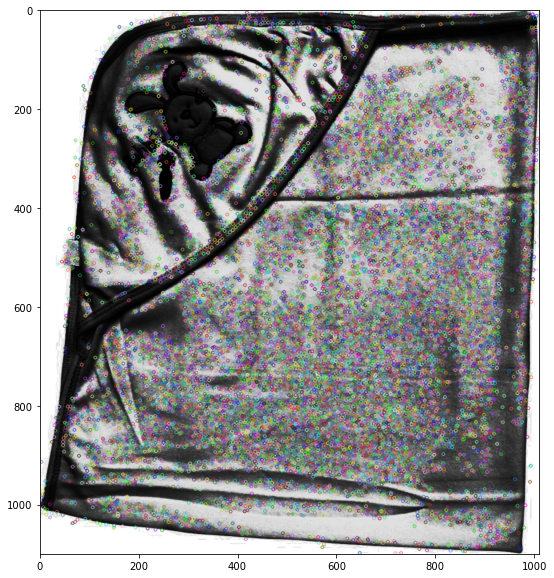

Descripteurs :  (16633, 128)

[[ 0.  0.  0. ...  5.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 3.  2.  0. ...  0.  0.  4.]
 ...
 [32.  2.  0. ...  0.  0.  1.]
 [13.  1.  0. ...  0.  0.  0.]
 [10.  0.  0. ...  0.  0.  0.]]


In [225]:
import cv2

#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
print("original image:")
image_test = imread(path+list_of_list_category[0][100])
plt.imshow(image_test)
plt.show()
print("image after cv2.imread:")
image_test_cv2_imread = cv2.imread(path+list_of_list_category[0][100],0) # convert in gray
plt.imshow(image_test_cv2_imread)
plt.show()
print("image after histogram is equalized:")
image_test_equalize = cv2.equalizeHist(image_test_cv2_imread)   # equalize image histogram
plt.imshow(image_test_equalize)
plt.show()
kp, des = sift.detectAndCompute(image_test_equalize, None)
img_test_SIFT = cv2.drawKeypoints(image_test_equalize,kp,image_test_equalize)
print("image with SIFT descriptors:")
plt.figure(figsize = (20,10))
plt.imshow(img_test_SIFT)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

#### Pré-traitement des images via SIFT

#### Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [226]:
# identification des key points et des descripteurs associés
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(2000)

In [227]:
len(list_photos)

1050

In [228]:
for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    image2 = cv2.resize(image, (224,224), interpolation=cv2.INTER_LINEAR)
    image3 = cv2.equalizeHist(image2)   # equalize image histogram
    res = cv2.GaussianBlur(image3,(3,3),0)
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

0
100
200
300
400
500
600
700
800
900
1000


In [229]:
type(sift_keypoints)

list

In [230]:
len(sift_keypoints)

1050

In [231]:
sift_keypoints_by_img = np.asarray(sift_keypoints, dtype=object)

In [232]:
len(sift_keypoints_by_img)

1050

In [233]:
sift_keypoints_by_img = np.asarray(sift_keypoints, dtype=object)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")


Nombre de descripteurs :  (445007, 128)
temps de traitement SIFT descriptor :            50.17 secondes


#### Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [234]:
from sklearn import cluster, metrics

# Détermination du nombre de clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  667
Création de 667 clusters de descripteurs ...
temps de traitement kmeans :           110.19 secondes


#### Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [235]:
# Création des histogrammes (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

In [236]:
# Création d'une matrix des histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calcul l'histogramme
    hist_vectors.append(hist) #l'histogramme est le vecteur des features

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             5.72 secondes


In [237]:
im_features.shape

(1050, 667)

In [238]:
len(sift_keypoints_by_img)

1050

In [239]:
sift_keypoints_by_img.shape

(1050,)

In [240]:
X_features_SIFT = im_features

In [241]:
type(X_features_SIFT)

numpy.ndarray

In [242]:
X_features_SIFT.shape

(1050, 667)

### B - 1.2. Modèle SIFT : Analyse PCA et Clustering avec KMeans

In [243]:
# clustering et réduction de dimension
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [244]:
# Choix du nombre de composantes à calculer
n_comp_SIFT = 600

In [245]:
# Calcul des composantes principales
pca_SIFT = PCA(n_components=n_comp_SIFT)
pca_SIFT.fit(X_features_SIFT)

PCA(n_components=600)

In [246]:
x_SIFT = pca_SIFT.transform(X_features_SIFT)

In [247]:
x_SIFT.shape

(1050, 600)

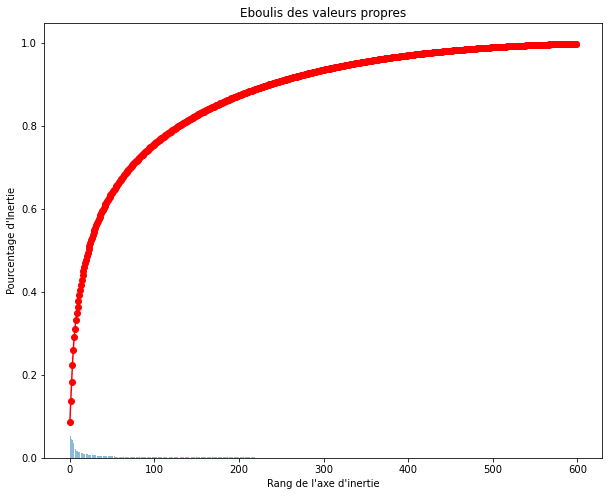

In [248]:
# Eboulis des valeurs propres
exp_var_pca_SIFT = pca_SIFT.explained_variance_ratio_

cum_sum_exp_var_pca_SIFT = np.cumsum(exp_var_pca_SIFT)

fig = plt.figure(figsize=(10,8))
plt.bar(np.arange(0,len(exp_var_pca_SIFT),1), exp_var_pca_SIFT, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(np.arange(0,len(cum_sum_exp_var_pca_SIFT),1),cum_sum_exp_var_pca_SIFT, c="red", marker='o')
plt.ylabel("Pourcentage d'Inertie")
plt.xlabel("Rang de l'axe d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [249]:
# On effectue le clustering des features
kmeans_SIFT = KMeans(n_clusters=7, random_state=22)
kmeans_SIFT.fit(x_SIFT)

KMeans(n_clusters=7, random_state=22)

In [250]:
x_SIFT.shape

(1050, 600)

In [251]:
#prédiction des labels de clusters
labels_SIFT = kmeans_SIFT.fit_predict(x_SIFT)

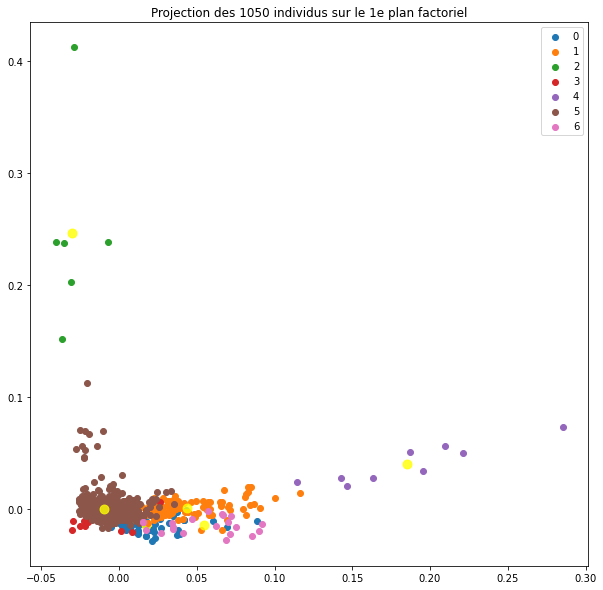

In [252]:
#Récupération des labels
u_labels_SIFT = np.unique(labels_SIFT)
centroids_SIFT = kmeans_SIFT.cluster_centers_

#Représentation graphique:
plt.figure(figsize=(10,10))
for i in u_labels_SIFT:
    plt.scatter(x_SIFT[labels_SIFT == i , 0] , x_SIFT[labels_SIFT == i , 1] , label = i)
    plt.scatter(centroids_SIFT[i,0], centroids_SIFT[i,1], s = 80, alpha = 0.8, color = 'yellow')
plt.legend()
plt.title("Projection des {} individus sur le 1e plan factoriel".format(x_SIFT.shape[0]))
plt.show(block=False)

### B - 1.3. Modèle SIFT : Calcul de l'ARI

In [253]:
df_SIFT_for_ARI = pd.DataFrame()

In [254]:
df_SIFT_for_ARI ['labels_predicted_SIFT_clustering'] = labels_SIFT

In [255]:
df_SIFT_for_ARI ['category'] = data["category"]

In [256]:
df_SIFT_for_ARI.head()

labels_predicted_SIFT_clustering    category
0                                 5  Furnishing
1                                 2        Baby
2                                 5        Baby
3                                 5  Furnishing
4                                 5  Furnishing

In [257]:
predicted_labels_SIFT = df_SIFT_for_ARI['labels_predicted_SIFT_clustering']

In [258]:
true_labels = df_SIFT_for_ARI['category']

In [259]:
print("ARI : ", metrics.adjusted_rand_score(true_labels, predicted_labels_SIFT))

ARI :  4.167275476112594e-05


### B - 1.4. Modèle avec SIFT : Représentation t-SNE selon les catégories réelles et selon les clusters

In [260]:
tsne_SIFT = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_SIFT = tsne_SIFT.fit_transform(x_SIFT)

In [261]:
df_tsne_SIFT = pd.DataFrame(X_tsne_SIFT[:,0:2], columns=['tsne1', 'tsne2'])

In [262]:
df_tsne_SIFT['labels_predicted_SIFT_clustering'] = df_SIFT_for_ARI['labels_predicted_SIFT_clustering']

In [263]:
df_tsne_SIFT['category'] = df_SIFT_for_ARI['category']

In [264]:
df_tsne_SIFT.head()

tsne1      tsne2  labels_predicted_SIFT_clustering    category
0   4.866274  15.305575                                 5  Furnishing
1  18.685320   6.851974                                 2        Baby
2   4.397856  -8.370358                                 5        Baby
3   4.310914  -0.938883                                 5  Furnishing
4   4.174291  -3.675933                                 5  Furnishing

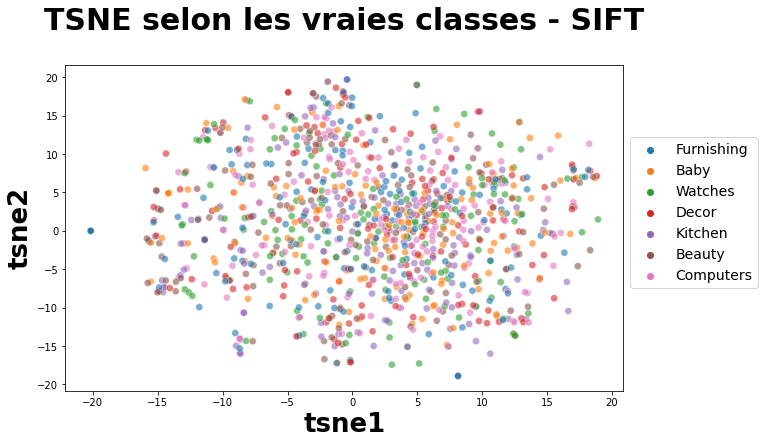

In [265]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="category", data=df_tsne_SIFT, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les vraies classes - SIFT', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

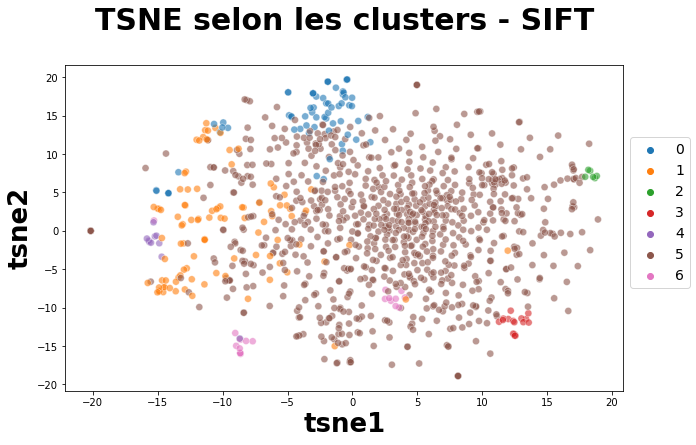

In [266]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels_predicted_SIFT_clustering", data=df_tsne_SIFT, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les clusters - SIFT', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

## B - 2. CNN - VGG16

### B - 2.0. Préparation des données

In [267]:
# Pour l'upload et le processing the images  
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

In [268]:
# modèles 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

In [269]:
# clustering et réduction de dimension
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [270]:
# pour le reste
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [271]:
import tensorflow as tf

In [272]:
from pathlib import Path

In [295]:
path_2 = Path('/Users/moninechan/Documents/Openclassroom/DS/Projet_6/P6_Notebooks/data/Images_redo_CNN')
# change the working directory to the path where the images are located
os.chdir(path_2)

In [296]:
# Cette list contient tous les noms des images
list_photos = []

In [297]:
# créé un ScandirIterator avec les fichiers comme alias
with os.scandir(path_2) as files:
  # Boucle qui passe en revue chaque fichier dans le répertoire
    for file in files:
        if file.name.endswith('.jpg'):
          # rajoute l'image à la liste
            list_photos.append(file.name)

In [298]:
len(list_photos)

1050

In [299]:
import cv2

In [300]:
img_width, img_height = 224, 224 #Default input size for VGG16

In [301]:
model = VGG16(weights='imagenet', input_shape=(img_width, img_height, 3))

In [302]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [303]:
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [304]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [305]:
df_data = pd.read_csv('/Users/moninechan/Documents/Openclassroom/DS/Projet_6/P6_Notebooks/Cleaned_DF/df_final_cat_P6.csv')

In [306]:
df_data = df_data.drop('Unnamed: 0', 1)

In [307]:
df_data.head()

category                           uniq_id  \
0  Furnishing  55b85ea15a1536d46b7190ad6fff8ce7   
1        Baby  7b72c92c2f6c40268628ec5f14c6d590   
2        Baby  64d5d4a258243731dc7bbb1eef49ad74   
3  Furnishing  d4684dcdc759dd9cdf41504698d737d8   
4  Furnishing  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  
0  Key Features of Elegance Polyester Multicolor ...  
1  Specifications of Sathiyas Cotton Bath Towel (...  
2  Key Features of Eurospa Cotton Terry Face Towe...  
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  
4  Key Features of Jaipur Print Cotton Floral Kin...

In [308]:
list_category = sorted(pd.unique(df_data['category']).tolist())

In [309]:
list_category

['Baby', 'Beauty', 'Computers', 'Decor', 'Furnishing', 'Kitchen', 'Watches']

In [310]:
def extract_features(file, model):
    # charge l'image en tant qu'array de dimension 224x224
    img = load_img(file, target_size=(224,224))
    # convertit de 'PIL.Image.Image' vers numpy array
    img = np.array(img) 
    # reformatte les données pour le modèle : reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prépare l'image pour le modèle
    imgx = preprocess_input(reshaped_img)
    # extraction des features
    feature = model.predict(imgx, use_multiprocessing=True)
    return feature

In [311]:
list_photos

['aa68675f50a0551b8dadb954017a50a1.jpg',
 '037c2402fee39fbc80433935711d1383.jpg',
 '42643c1c9403f67921a18654bcf45ead.jpg',
 '53f4bc7d7321f5c41de6b86e41f13e80.jpg',
 'b144a363c107c7bdd91f32d6e28ba6f2.jpg',
 'db3e2eeb4fe90d4755f2911d661eae95.jpg',
 '9a9402ad55d079c86c302521816b7b0e.jpg',
 '42a8fef62716772c391fbdd148cc9c16.jpg',
 '503bb08f7bdf6a395ec564dd1dc83619.jpg',
 '42770faa04bfcf2b62e7ef335e1b1965.jpg',
 '9c4ab8ab059c912090c83cb0818e7f1c.jpg',
 'f2fa99bfaa4aa65a2bd53337e140f949.jpg',
 'a618354ba17cff64826558d81afc77ab.jpg',
 'c063d07d78a55a21bf6c0e7c8ae46a6d.jpg',
 'e99d9abb115a9bd580bcccf9ff4d4881.jpg',
 '1d829e0eac91d7e85cdd6d581c363360.jpg',
 '5c7b493625b5fc6689cae49d25e1ae17.jpg',
 '06749cbff1487f470438823f6952cfd1.jpg',
 'ab3f4b2d2ec007b7e0eaec213bfdbffc.jpg',
 '473b1ab1abe21826c41efa1584a88a63.jpg',
 '07912328f580cf080d721e6466287896.jpg',
 'e47b9f88b773b3fd97ab3b51642ff6fb.jpg',
 '5cd3d274d71e1e0d6bf075421461b2d5.jpg',
 '7264f56639c8c54158b94ced769082c8.jpg',
 '0991e8d8f88400

On va faire ensuite un tri des photos avec sort (très important pour que le calcul de l'ARI soit correct car sinon, l'ordre des features (et donc des classes prédites par clustering) ne correspondra pas à l'ordre des classes réelles.

In [312]:
list_photos_sorted = list_photos

In [313]:
list_photos_sorted.sort()

In [314]:
list_photos_sorted

['009099b1f6e1e8f893ec29a7023153c4.jpg',
 '0096e89cc25a8b96fb9808716406fe94.jpg',
 '00cbbc837d340fa163d11e169fbdb952.jpg',
 '00d84a518e0550612fcfcba3b02b6255.jpg',
 '00e966a5049a262cfc72e6bbf68b80e7.jpg',
 '00ed03657cedbe4663eff2d7fa702a33.jpg',
 '01089dc3618a0ab7304d784ef400b83d.jpg',
 '0131e5d87b72877702d536299cf83b75.jpg',
 '020d2daba55a723128e4e07c0b0393a9.jpg',
 '02127f52e96fb72c66bf081d25104ef8.jpg',
 '025a85a3d1cddc6307f7dc075d8d2132.jpg',
 '02a53d335775b652f22f41b529b9d646.jpg',
 '02c63a087b298ec74042d557acf61be1.jpg',
 '031c98cfde349d99fb6d5983f54c8751.jpg',
 '032e812adcd11a38fd8b764891a852ff.jpg',
 '037b39bef3db7ccd264c577a0edf0c0a.jpg',
 '037c2402fee39fbc80433935711d1383.jpg',
 '04f9f818e2d657b873b07578cfe2eade.jpg',
 '04f9ff160a1561e3656350f4bd6b8c50.jpg',
 '050ea3acb555bf641e7ae9b4f3ba684a.jpg',
 '052559ede419996737893eb47568ee7f.jpg',
 '057836ecde71565f8ebdd576e41fdc96.jpg',
 '059493eeb88ebb4cc08d1522f3f87c3f.jpg',
 '059bc43e03e1824a9ab6466e32e5f137.jpg',
 '06749cbff1487f

In [315]:
CNN_features = []

In [316]:
CNN_imagepath = []

In [317]:
# Boucle à travers chaque image du dataset
for photo in list_photos_sorted:
    # extraction des features et mise à jour des listes
        feat = extract_features(photo,model)
        CNN_features.append(feat)
        CNN_imagepath.append(photo)

1/1 [==============================] - 1s 981ms/step


1/1 [==============================] - 1s 875ms/step


/Users/moninechan/opt/anaconda3/lib/python3.8/site-packages/PIL/Image.py:2855: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 1s 766ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 837ms/step


In [318]:
CNN_imagepath[0]

'009099b1f6e1e8f893ec29a7023153c4.jpg'

In [319]:
CNN_features[0]

array([[2.5928068 , 2.6987543 , 0.        , ..., 0.87792265, 0.        ,
        2.9672086 ]], dtype=float32)

In [320]:
len(CNN_features[0])

1

In [321]:
CNN_features[0].shape

(1, 4096)

In [322]:
CNN_features[0][0]

array([2.5928068 , 2.6987543 , 0.        , ..., 0.87792265, 0.        ,
       2.9672086 ], dtype=float32)

In [323]:
image_0 = CNN_imagepath[0]

In [324]:
image_0

'009099b1f6e1e8f893ec29a7023153c4.jpg'

In [325]:
features_0 = extract_features(image_0, model)

1/1 [==============================] - 1s 802ms/step


In [326]:
features_0

array([[2.5928068 , 2.6987543 , 0.        , ..., 0.87792265, 0.        ,
        2.9672086 ]], dtype=float32)

In [327]:
features_0.shape

(1, 4096)

In [328]:
np.array_equal(CNN_features[0], extract_features(CNN_imagepath[0], model))

1/1 [==============================] - 1s 760ms/step


True

In [329]:
np.array_equal(CNN_features[1049], extract_features(CNN_imagepath[1049], model))

1/1 [==============================] - 1s 990ms/step


True

In [330]:
type(CNN_features)

list

In [331]:
# get a list of just the features
feat = np.array(CNN_features)

In [332]:
type(feat)

numpy.ndarray

In [333]:
feat.shape

(1050, 1, 4096)

In [334]:
# reshape
feat_reshaped = feat.reshape(-1,4096)

In [335]:
feat_reshaped.shape

(1050, 4096)

### B - 2.2. Modèle CNN : Analyse PCA et Clustering avec KMeans

In [336]:
from sklearn.decomposition import PCA

In [337]:
# Choix du nombre de composantes à calculer
n_comp = 950

In [338]:
# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(feat_reshaped)

PCA(n_components=950)

In [339]:
x = pca.transform(feat_reshaped)

In [340]:
x.shape

(1050, 950)

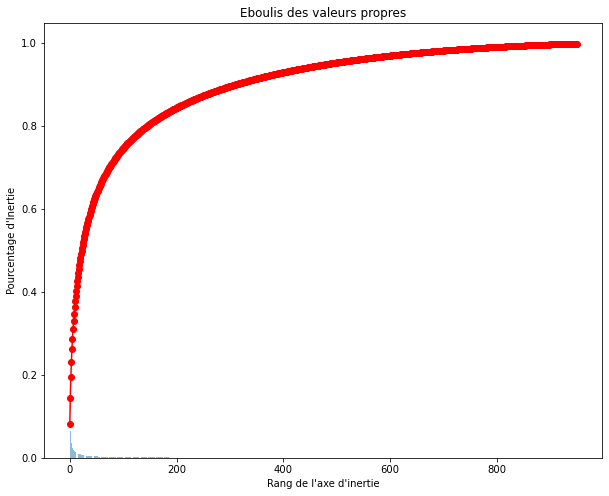

In [341]:
# Eboulis des valeurs propres
exp_var_pca = pca.explained_variance_ratio_

cum_sum_exp_var_pca = np.cumsum(exp_var_pca)

fig = plt.figure(figsize=(10,8))
plt.bar(np.arange(0,len(exp_var_pca),1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(np.arange(0,len(cum_sum_exp_var_pca),1),cum_sum_exp_var_pca, c="red", marker='o')
plt.ylabel("Pourcentage d'Inertie")
plt.xlabel("Rang de l'axe d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [342]:
# On effectue le clustering des features
kmeans = KMeans(n_clusters=7, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=7, random_state=22)

In [343]:
x.shape

(1050, 950)

In [344]:
#prédiction des labels de clusters
labels_CNN = kmeans.fit_predict(x)

In [345]:
labels_CNN.shape

(1050,)

In [346]:
labels_CNN

array([4, 0, 3, ..., 6, 5, 0], dtype=int32)

In [347]:
labels_cnn = labels_CNN

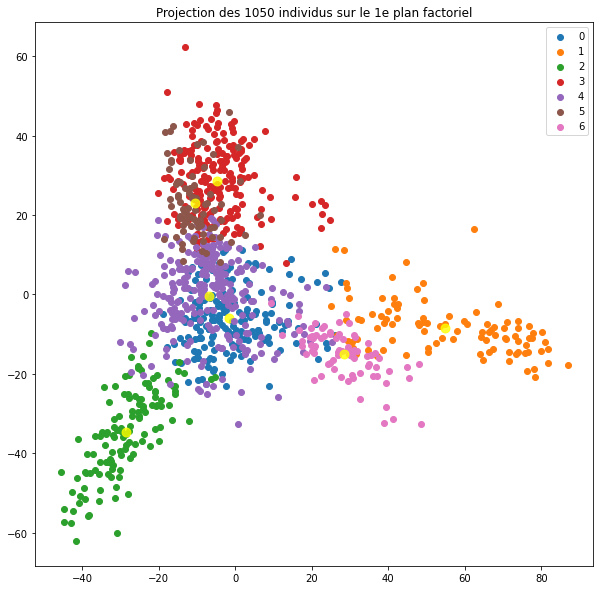

In [348]:
#Récupération des labels
u_labels = np.unique(labels_cnn)
centroids = kmeans.cluster_centers_

#Représentation graphique:
plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(x[labels_cnn == i , 0] , x[labels_cnn == i , 1] , label = i)
    plt.scatter(centroids[i,0], centroids[i,1], s = 80, alpha = 0.8, color = 'yellow')
plt.legend()
plt.title("Projection des {} individus sur le 1e plan factoriel".format(x.shape[0]))
plt.show(block=False)

### B - 2.3. Modèle CNN : Calcul de l'ARI

In [349]:
len(CNN_imagepath)

1050

In [350]:
len(labels_CNN)

1050

In [351]:
df_CNN = pd.DataFrame()

In [352]:
df_CNN['image_path']= CNN_imagepath

In [353]:
df_CNN['label_CNN_cluster']= labels_CNN

In [354]:
df_CNN

image_path  label_CNN_cluster
0     009099b1f6e1e8f893ec29a7023153c4.jpg                  4
1     0096e89cc25a8b96fb9808716406fe94.jpg                  0
2     00cbbc837d340fa163d11e169fbdb952.jpg                  3
3     00d84a518e0550612fcfcba3b02b6255.jpg                  1
4     00e966a5049a262cfc72e6bbf68b80e7.jpg                  0
...                                    ...                ...
1045  feefbdff924dd6b7cc266449c9a36d69.jpg                  6
1046  ff24511994fc459d04145231c8876d6c.jpg                  5
1047  ffbf3794aa8cb6bb8d3f313d0a549a09.jpg                  6
1048  ffc2e1fc7c886ec09a331040ada038aa.jpg                  5
1049  fffa2117a4006d4a848eb7d5b80d4816.jpg                  0

[1050 rows x 2 columns]

In [355]:
df_CNN_Cluster_0 = df_CNN.loc[df_CNN['label_CNN_cluster'] == 0]
df_CNN_Cluster_1 = df_CNN.loc[df_CNN['label_CNN_cluster'] == 1]
df_CNN_Cluster_2 = df_CNN.loc[df_CNN['label_CNN_cluster'] == 2]
df_CNN_Cluster_3 = df_CNN.loc[df_CNN['label_CNN_cluster'] == 3]
df_CNN_Cluster_4 = df_CNN.loc[df_CNN['label_CNN_cluster'] == 4]
df_CNN_Cluster_5 = df_CNN.loc[df_CNN['label_CNN_cluster'] == 5]
df_CNN_Cluster_6 = df_CNN.loc[df_CNN['label_CNN_cluster'] == 6]

In [356]:
print("nombre d'éléments dans df_CNN_Cluster_0 :",df_CNN_Cluster_0.shape[0])
print("nombre d'éléments dans df_CNN_Cluster_1 :",df_CNN_Cluster_1.shape[0])
print("nombre d'éléments dans df_CNN_Cluster_2 :",df_CNN_Cluster_2.shape[0])
print("nombre d'éléments dans df_CNN_Cluster_3 :",df_CNN_Cluster_3.shape[0])
print("nombre d'éléments dans df_CNN_Cluster_4 :",df_CNN_Cluster_4.shape[0])
print("nombre d'éléments dans df_CNN_Cluster_5 :",df_CNN_Cluster_5.shape[0])
print("nombre d'éléments dans df_CNN_Cluster_6 :",df_CNN_Cluster_6.shape[0])

nombre d'éléments dans df_CNN_Cluster_0 : 197
nombre d'éléments dans df_CNN_Cluster_1 : 99
nombre d'éléments dans df_CNN_Cluster_2 : 128
nombre d'éléments dans df_CNN_Cluster_3 : 206
nombre d'éléments dans df_CNN_Cluster_4 : 266
nombre d'éléments dans df_CNN_Cluster_5 : 78
nombre d'éléments dans df_CNN_Cluster_6 : 76


In [357]:
# Contient le numéro d'id du cluster et les images associées à ce cluster { id: [images] }
groups = {}
for file, cluster in zip(CNN_imagepath,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [358]:
# fonction qui affiche les images d'un cluster
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # récupere la liste des noms de fichier pour un cluster
    files = groups[cluster]
    # autorise jusqu'à 30 images à être affichées
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # Affiche chaque image pour un cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 197 to 30


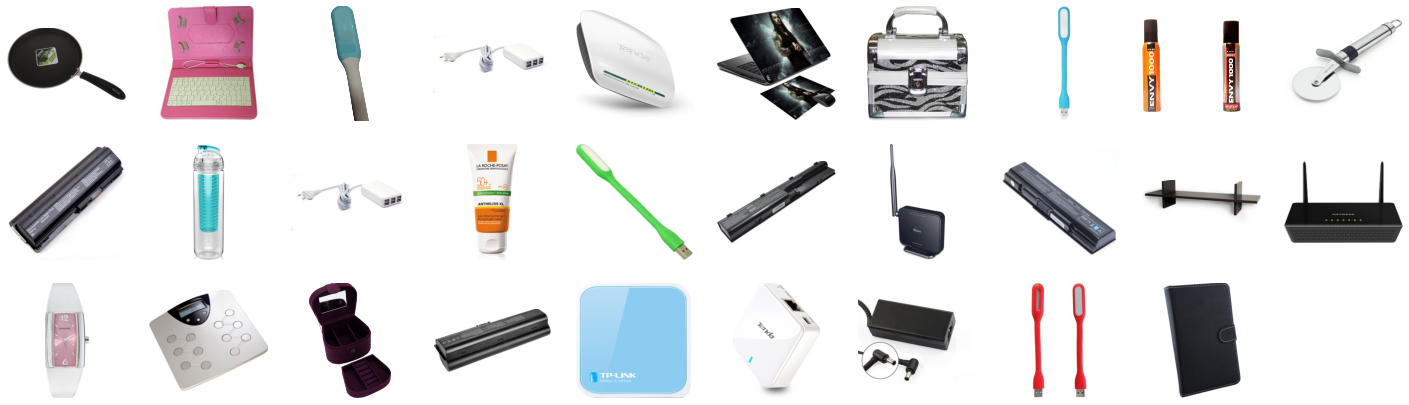

In [359]:
view_cluster(0)

Clipping cluster size from 99 to 30


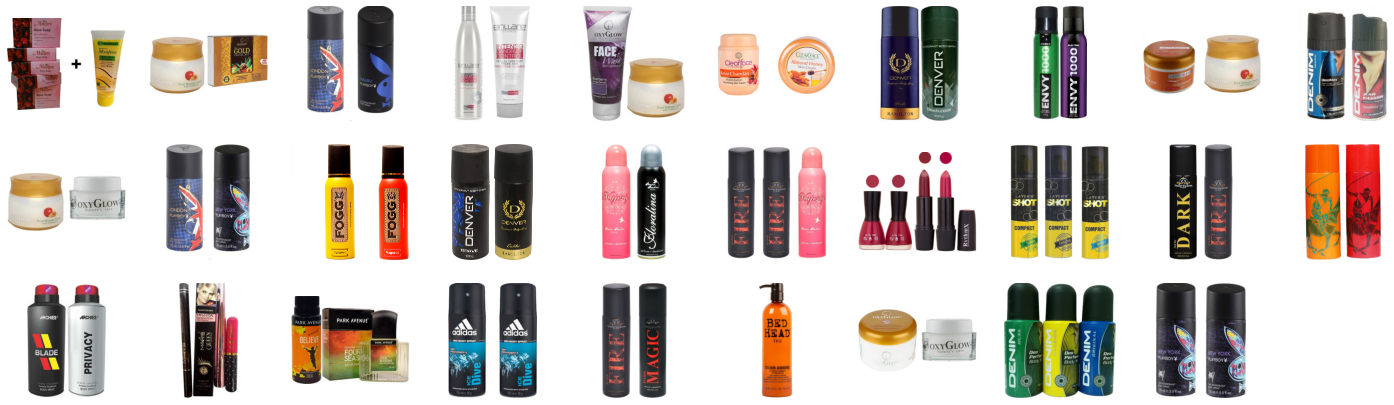

In [360]:
view_cluster(1)

Clipping cluster size from 128 to 30


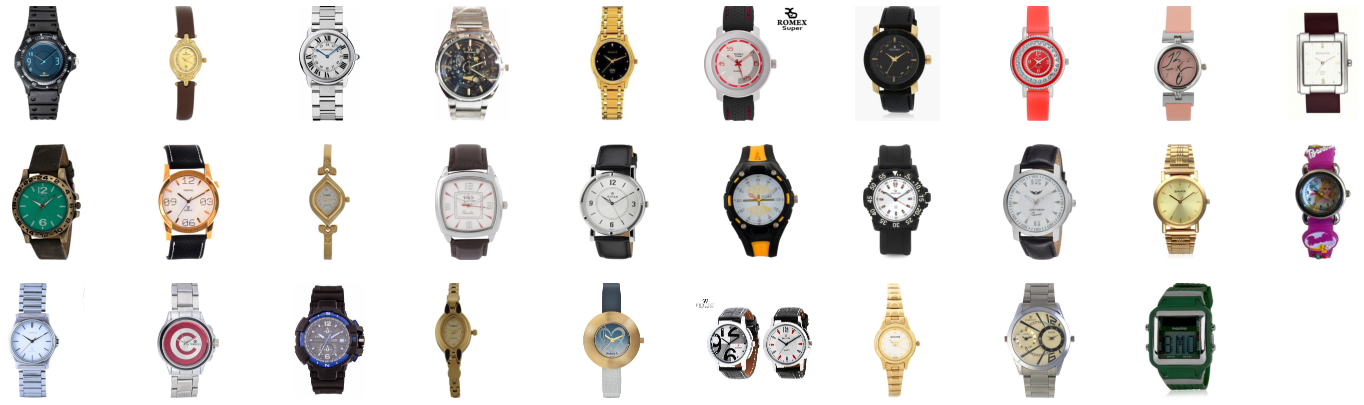

In [361]:
view_cluster(2)

Clipping cluster size from 206 to 30


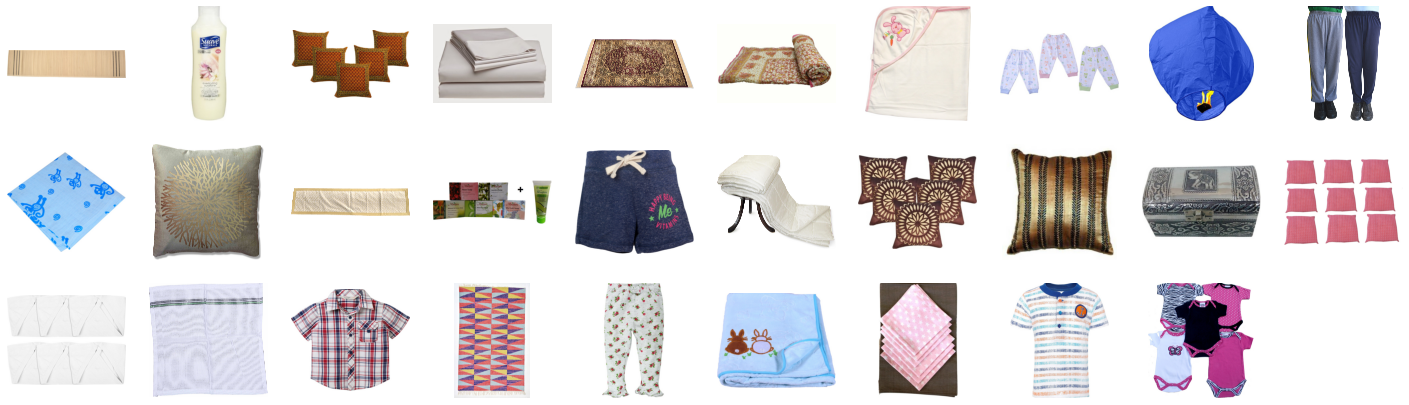

In [362]:
view_cluster(3)

Clipping cluster size from 266 to 30


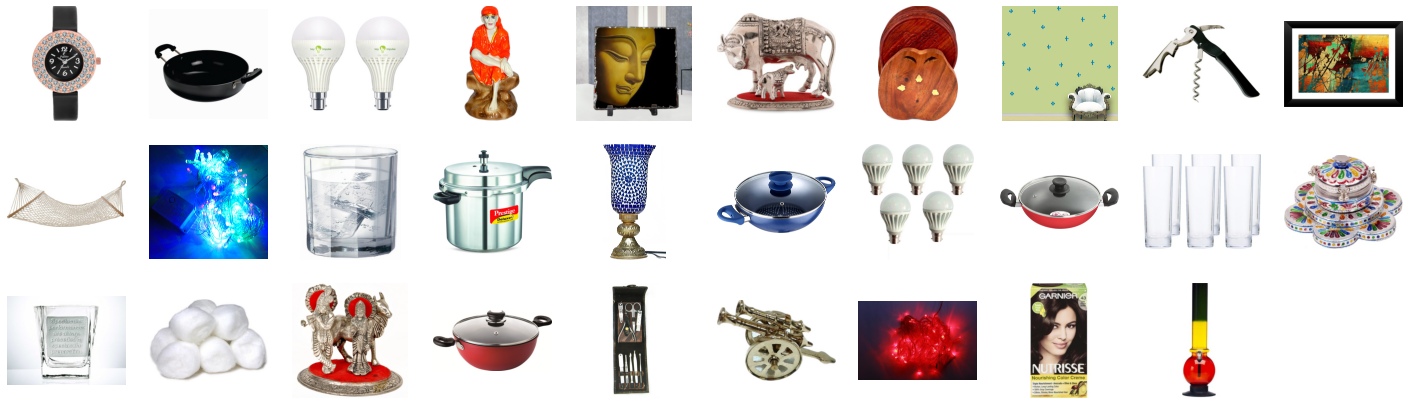

In [363]:
view_cluster(4)

Clipping cluster size from 78 to 30


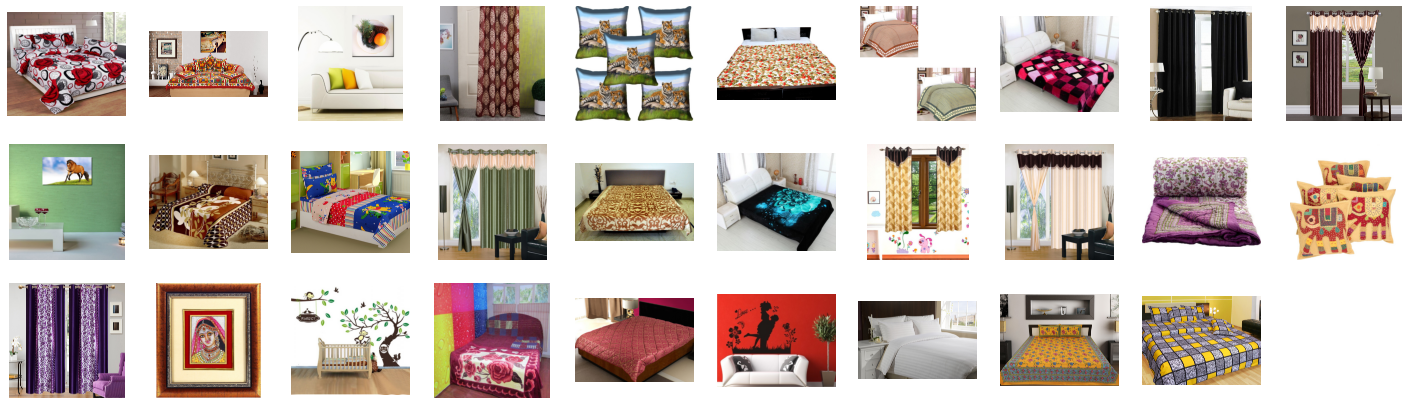

In [364]:
view_cluster(5)

Clipping cluster size from 76 to 30


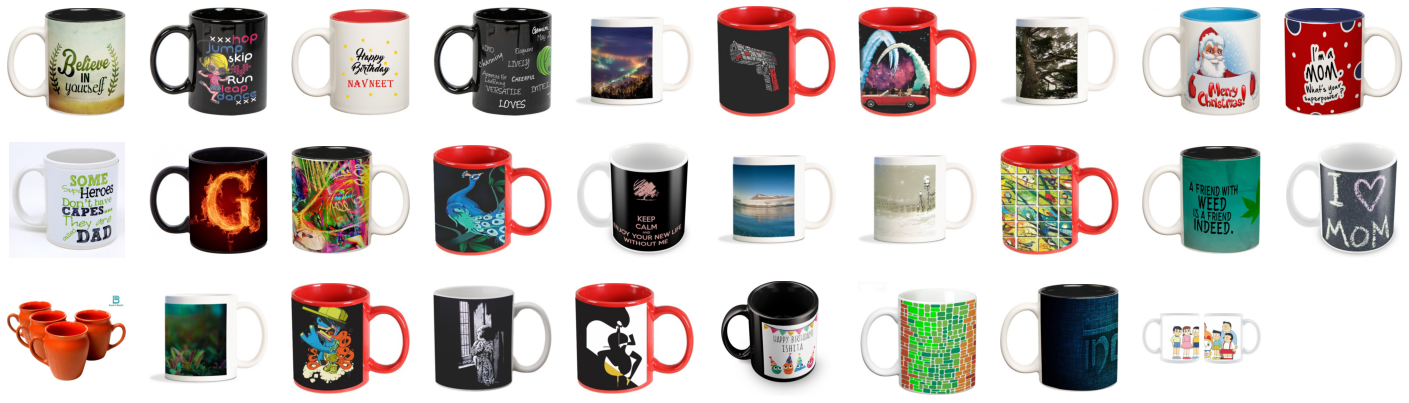

In [365]:
view_cluster(6)

In [366]:
groups

{4: ['009099b1f6e1e8f893ec29a7023153c4.jpg',
  '0131e5d87b72877702d536299cf83b75.jpg',
  '025a85a3d1cddc6307f7dc075d8d2132.jpg',
  '032e812adcd11a38fd8b764891a852ff.jpg',
  '037b39bef3db7ccd264c577a0edf0c0a.jpg',
  '04f9f818e2d657b873b07578cfe2eade.jpg',
  '04f9ff160a1561e3656350f4bd6b8c50.jpg',
  '057836ecde71565f8ebdd576e41fdc96.jpg',
  '06fdaa2b03d70da4358311d260456729.jpg',
  '07912328f580cf080d721e6466287896.jpg',
  '08bdf59c9dcb241e3a57eb4f3729ec70.jpg',
  '09f9f9b420edea2f39c0dc3c24d5be07.jpg',
  '0b852704f2002f8865a68818ad4951da.jpg',
  '0b8c4bc35aee94af356cb1fd2dfa0219.jpg',
  '0bb0f7b7a3075f4b9459121abe2185fa.jpg',
  '0c4718ae90f2889b7021a99ee1cc106c.jpg',
  '0ca8e323551dd7107ef57ef7c3e77aee.jpg',
  '0e73201f6d8807776e1d21c969078289.jpg',
  '0f4f761de4224b004402c1f97e871ba4.jpg',
  '0f7a56876c61ba98dfed48ede5d3f3e1.jpg',
  '10ad262ebfdc8614e847d36e6fe9ecf9.jpg',
  '11f06dffebf7edf9e15351834a190c2c.jpg',
  '1218fd9be42d45a81846db9f65a983bd.jpg',
  '1357e9d24661c3b5797aa1016e0c

In [367]:
groups[0]

['0096e89cc25a8b96fb9808716406fe94.jpg',
 '00e966a5049a262cfc72e6bbf68b80e7.jpg',
 '00ed03657cedbe4663eff2d7fa702a33.jpg',
 '01089dc3618a0ab7304d784ef400b83d.jpg',
 '02c63a087b298ec74042d557acf61be1.jpg',
 '031c98cfde349d99fb6d5983f54c8751.jpg',
 '059493eeb88ebb4cc08d1522f3f87c3f.jpg',
 '078b35be31e8ac99b0cbb817dab4c23f.jpg',
 '079d049de21fb2426b516a8d2f9a8bdb.jpg',
 '093097cfe5626f4ad8914e0a16a940b5.jpg',
 '0d02f4703fde00645704e15bba23e77d.jpg',
 '0ddc40c08d9a9bafc4d14eddd98db7c0.jpg',
 '136f213080426c35520f1b1540c4a390.jpg',
 '142994b421c052a6193052c6c8c3d076.jpg',
 '146b0d570d5ab4e27629d48533b7680d.jpg',
 '19d2dbc1789653c58bce08c169662cf2.jpg',
 '1eda39f01d0a8a2e5ce4b32fc7da1027.jpg',
 '209bf06a732416f1ce5147a8b0524808.jpg',
 '20a06aad5f04727dd54bf13dd5923518.jpg',
 '215decf6f993d7b45d75520d9174493f.jpg',
 '235410c63d373e2fe141c129de2f624f.jpg',
 '23704dd51c975e845c574b044aae0a9f.jpg',
 '24e85c590481a7cedfe66597f253f2b2.jpg',
 '2580f7559802e4e5e3695fda6cbfc317.jpg',
 '2670ba9bc61b42

In [368]:
list_of_groups = []
for i in range(len(groups)):
    list_of_groups.append( [] )
    list_of_groups[i] = groups[i]

In [369]:
len(groups)

7

In [370]:
len(list_of_groups[0])

197

In [371]:
len(list_of_groups[1])

99

In [372]:
len(groups[1])

99

In [373]:
from nltk import flatten

In [374]:
list_of_groups_flattened = flatten(list_of_groups)

In [375]:
len(list_of_groups_flattened)

1050

In [376]:
list_size_clusters = []
for i in range(len(groups)):
    list_size_clusters.append([])
    list_size_clusters[i] = len(groups[i])

In [377]:
list_size_clusters

[197, 99, 128, 206, 266, 78, 76]

In [378]:
list_size_clusters[6]

76

In [379]:
list_size_clusters = [197, 99, 128, 206, 266, 78, 79]
list_index_clusters = []
list_index_clusters = [0 for i in range(len(list_size_clusters))]
list_index_clusters[0] = list_size_clusters[0] - 1
i = 1
while(i<len(list_size_clusters)):
    list_index_clusters[i] = list_size_clusters[i] + list_index_clusters[i-1]
    i = i + 1
list_index_clusters

[196, 295, 423, 629, 895, 973, 1052]

In [380]:
list_index_clusters_init = [0, 196, 295, 423, 629, 895, 973, 1052]

In [381]:
list_size_clusters = [197, 99, 128, 206, 266, 78, 79]

In [382]:
CNN_cluster_number_V2 = []

In [383]:
k = 0
for i in range(len(list_size_clusters)):
    for j in range(list_size_clusters[i]):
        CNN_cluster_number_V2.append([])
        CNN_cluster_number_V2[k] = i
        k = k + 1

In [384]:
len(CNN_cluster_number_V2)

1053

In [385]:
df_CNN_for_ARI = pd.DataFrame(list(zip(list_of_groups_flattened, CNN_cluster_number_V2)),
               columns =['image_path', 'CNN_Cluster_number'])

In [386]:
df_CNN_for_ARI

image_path  CNN_Cluster_number
0     0096e89cc25a8b96fb9808716406fe94.jpg                   0
1     00e966a5049a262cfc72e6bbf68b80e7.jpg                   0
2     00ed03657cedbe4663eff2d7fa702a33.jpg                   0
3     01089dc3618a0ab7304d784ef400b83d.jpg                   0
4     02c63a087b298ec74042d557acf61be1.jpg                   0
...                                    ...                 ...
1045  fc7abdf67b4d7dbf64dffbab7b37599c.jpg                   6
1046  fc8ff72b68b0f3736a9aff8f03aa712f.jpg                   6
1047  fd369a1bb58ae02cd925dda7e9e1d00a.jpg                   6
1048  feefbdff924dd6b7cc266449c9a36d69.jpg                   6
1049  ffbf3794aa8cb6bb8d3f313d0a549a09.jpg                   6

[1050 rows x 2 columns]

In [387]:
df_CNN_for_ARI['category_CNN'] = 'to_update'

In [388]:
df_CNN_for_ARI

image_path  CNN_Cluster_number category_CNN
0     0096e89cc25a8b96fb9808716406fe94.jpg                   0    to_update
1     00e966a5049a262cfc72e6bbf68b80e7.jpg                   0    to_update
2     00ed03657cedbe4663eff2d7fa702a33.jpg                   0    to_update
3     01089dc3618a0ab7304d784ef400b83d.jpg                   0    to_update
4     02c63a087b298ec74042d557acf61be1.jpg                   0    to_update
...                                    ...                 ...          ...
1045  fc7abdf67b4d7dbf64dffbab7b37599c.jpg                   6    to_update
1046  fc8ff72b68b0f3736a9aff8f03aa712f.jpg                   6    to_update
1047  fd369a1bb58ae02cd925dda7e9e1d00a.jpg                   6    to_update
1048  feefbdff924dd6b7cc266449c9a36d69.jpg                   6    to_update
1049  ffbf3794aa8cb6bb8d3f313d0a549a09.jpg                   6    to_update

[1050 rows x 3 columns]

In [389]:
conditions = [
    (df_CNN_for_ARI['CNN_Cluster_number'] == 0),
    (df_CNN_for_ARI['CNN_Cluster_number'] == 1),
    (df_CNN_for_ARI['CNN_Cluster_number'] == 2),
    (df_CNN_for_ARI['CNN_Cluster_number'] == 3),
    (df_CNN_for_ARI['CNN_Cluster_number'] == 4),
    (df_CNN_for_ARI['CNN_Cluster_number'] == 5),
    (df_CNN_for_ARI['CNN_Cluster_number'] == 6)
]

values = ['Computers', 'Beauty', 'Watches', 'Baby', 'Decor', 'Furnishing', 'Kitchen']

df_CNN_for_ARI['category_CNN'] = np.select(conditions, values)

In [390]:
df_CNN_for_ARI.head(3)

image_path  CNN_Cluster_number category_CNN
0  0096e89cc25a8b96fb9808716406fe94.jpg                   0    Computers
1  00e966a5049a262cfc72e6bbf68b80e7.jpg                   0    Computers
2  00ed03657cedbe4663eff2d7fa702a33.jpg                   0    Computers

In [391]:
df_CNN_for_ARI.tail(3)

image_path  CNN_Cluster_number category_CNN
1047  fd369a1bb58ae02cd925dda7e9e1d00a.jpg                   6      Kitchen
1048  feefbdff924dd6b7cc266449c9a36d69.jpg                   6      Kitchen
1049  ffbf3794aa8cb6bb8d3f313d0a549a09.jpg                   6      Kitchen

In [392]:
print(pd.unique(df_CNN_for_ARI['category_CNN']))

['Computers' 'Beauty' 'Watches' 'Baby' 'Decor' 'Furnishing' 'Kitchen']


In [393]:
df_original_cluster = pd.read_csv('/Users/moninechan/Documents/Openclassroom/DS/Projet_6/Tuto_CNN_Gabe_Flomo/data.csv')

In [394]:
print(pd.unique(df_original_cluster['category']))

['Furnishing' 'Baby' 'Watches' 'Decor' 'Kitchen' 'Beauty' 'Computers']


In [395]:
df_original_cluster.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_original_cluster.head()

category                           uniq_id  \
0  Furnishing  55b85ea15a1536d46b7190ad6fff8ce7   
1        Baby  7b72c92c2f6c40268628ec5f14c6d590   
2        Baby  64d5d4a258243731dc7bbb1eef49ad74   
3  Furnishing  d4684dcdc759dd9cdf41504698d737d8   
4  Furnishing  6325b6870c54cd47be6ebfbffa620ec7   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                             image_path  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

In [396]:
df_CNN_for_ARI_sorted = df_CNN_for_ARI.copy()

In [397]:
df_original_cluster_sorted = df_original_cluster.copy()

In [398]:
df_CNN_for_ARI_sorted = df_CNN_for_ARI_sorted.sort_values('image_path', ascending=True)

In [399]:
df_original_cluster_sorted = df_original_cluster_sorted.sort_values('image_path', ascending=True)

In [400]:
df_CNN_for_ARI_sorted.head()

image_path  CNN_Cluster_number category_CNN
630  009099b1f6e1e8f893ec29a7023153c4.jpg                   4        Decor
0    0096e89cc25a8b96fb9808716406fe94.jpg                   0    Computers
424  00cbbc837d340fa163d11e169fbdb952.jpg                   3         Baby
197  00d84a518e0550612fcfcba3b02b6255.jpg                   1       Beauty
1    00e966a5049a262cfc72e6bbf68b80e7.jpg                   0    Computers

In [401]:
df_original_cluster_sorted.head()

category                           uniq_id  \
280     Watches  009099b1f6e1e8f893ec29a7023153c4   
86      Kitchen  0096e89cc25a8b96fb9808716406fe94   
724  Furnishing  00cbbc837d340fa163d11e169fbdb952   
820      Beauty  00d84a518e0550612fcfcba3b02b6255   
423   Computers  00e966a5049a262cfc72e6bbf68b80e7   

                                          product_name  \
280    palito PLO 166 Analog Watch  - For Girls, Women   
86                       oxford Tawa 15 cm cm diameter   
724    Flazee Home Trends Beige 144.78 cm Table Runner   
820  Mxofere Combo Rose Soap And Aloevera Lemon Fac...   
423        YGS Keyboard Case for Asus Memo Pad 7in Tab   

                                           description  \
280  Specifications of palito PLO 166 Analog Watch ...   
86   Key Features of oxford Tawa 15 cm cm diameter ...   
724  Buy Flazee Home Trends Beige 144.78 cm Table R...   
820  Buy Mxofere Combo Rose Soap And Aloevera Lemon...   
423  Key Features of YGS Keyboard Case for Asus Mem...   

                               image_path  
280  009099b1f6e1e8f893ec29a7023153c4.jpg  
86   0096e89cc25a8b96fb9808716406fe94.jpg  
724  00cbbc837d340fa163d11e169fbdb952.jpg  
820  00d84a518e0550612fcfcba3b02b6255.jpg  
423  00e966a5049a262cfc72e6bbf68b80e7.jpg

In [402]:
df_CNN_for_ARI_sorted.tail()

image_path  CNN_Cluster_number category_CNN
1048  feefbdff924dd6b7cc266449c9a36d69.jpg                   6      Kitchen
972   ff24511994fc459d04145231c8876d6c.jpg                   5   Furnishing
1049  ffbf3794aa8cb6bb8d3f313d0a549a09.jpg                   6      Kitchen
973   ffc2e1fc7c886ec09a331040ada038aa.jpg                   5   Furnishing
196   fffa2117a4006d4a848eb7d5b80d4816.jpg                   0    Computers

In [403]:
df_original_cluster_sorted.tail()

category                           uniq_id  \
141     Kitchen  feefbdff924dd6b7cc266449c9a36d69   
707  Furnishing  ff24511994fc459d04145231c8876d6c   
188     Kitchen  ffbf3794aa8cb6bb8d3f313d0a549a09   
812  Furnishing  ffc2e1fc7c886ec09a331040ada038aa   
858   Computers  fffa2117a4006d4a848eb7d5b80d4816   

                                          product_name  \
141       Rockmantra Red Flowers In Bucket Ceramic Mug   
707  Home Originals Polka, Abstract Double Blanket ...   
188  Returnfavors Cartoon shaped Coffee For Kids Ce...   
812               Raymond Abstract Double Blanket Grey   
858  De TechInn Flexible wire powered by 13 USB Led...   

                                           description  \
141  Rockmantra Red Flowers In Bucket Ceramic Mug (...   
707  Buy Home Originals Polka, Abstract Double Blan...   
188  Buy Returnfavors Cartoon shaped Coffee For Kid...   
812  Buy Raymond Abstract Double Blanket Grey at Rs...   
858  Buy De TechInn Flexible wire powered by 13 USB...   

                               image_path  
141  feefbdff924dd6b7cc266449c9a36d69.jpg  
707  ff24511994fc459d04145231c8876d6c.jpg  
188  ffbf3794aa8cb6bb8d3f313d0a549a09.jpg  
812  ffc2e1fc7c886ec09a331040ada038aa.jpg  
858  fffa2117a4006d4a848eb7d5b80d4816.jpg

In [404]:
original_labels = df_original_cluster_sorted['category']

In [405]:
CNN_for_ARI_labels = df_CNN_for_ARI_sorted['category_CNN']

In [406]:
from sklearn import cluster, metrics

In [407]:
print("ARI : ", metrics.adjusted_rand_score(original_labels, CNN_for_ARI_labels))

ARI :  0.482547063253418


### B - 2.4. Modèle avec CNN : Représentation t-SNE selon les catégories réelles et selon les clusters

In [408]:
from sklearn import manifold, decomposition

In [409]:
tsne_cnn = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_cnn = tsne_cnn.fit_transform(x)

In [410]:
df_tsne_cnn = pd.DataFrame(X_tsne_cnn[:,0:2], columns=['tsne1', 'tsne2'])

In [411]:
df_tsne_cnn.shape

(1050, 2)

In [412]:
df_tsne_cnn.head()

tsne1      tsne2
0   1.595371  32.262459
1  -4.846727  15.430499
2   7.969697 -18.254356
3 -17.436129 -24.432232
4  -0.276763 -11.125228

In [413]:
df_CNN_for_ARI.head()

image_path  CNN_Cluster_number category_CNN
0  0096e89cc25a8b96fb9808716406fe94.jpg                   0    Computers
1  00e966a5049a262cfc72e6bbf68b80e7.jpg                   0    Computers
2  00ed03657cedbe4663eff2d7fa702a33.jpg                   0    Computers
3  01089dc3618a0ab7304d784ef400b83d.jpg                   0    Computers
4  02c63a087b298ec74042d557acf61be1.jpg                   0    Computers

In [414]:
df_tsne_cnn["category"] = df_CNN_for_ARI['category_CNN']

In [415]:
print(df_tsne_cnn.shape)

(1050, 3)


In [416]:
df_tsne_cnn.head()

tsne1      tsne2   category
0   1.595371  32.262459  Computers
1  -4.846727  15.430499  Computers
2   7.969697 -18.254356  Computers
3 -17.436129 -24.432232  Computers
4  -0.276763 -11.125228  Computers

In [417]:
df_tsne_cnn['labels_cnn'] = labels_cnn

In [418]:
df_tsne_cnn.head()

tsne1      tsne2   category  labels_cnn
0   1.595371  32.262459  Computers           4
1  -4.846727  15.430499  Computers           0
2   7.969697 -18.254356  Computers           3
3 -17.436129 -24.432232  Computers           1
4  -0.276763 -11.125228  Computers           0

In [419]:
df_tsne_cnn['labels_cnn'].unique()

array([4, 0, 3, 1, 6, 2, 5], dtype=int32)

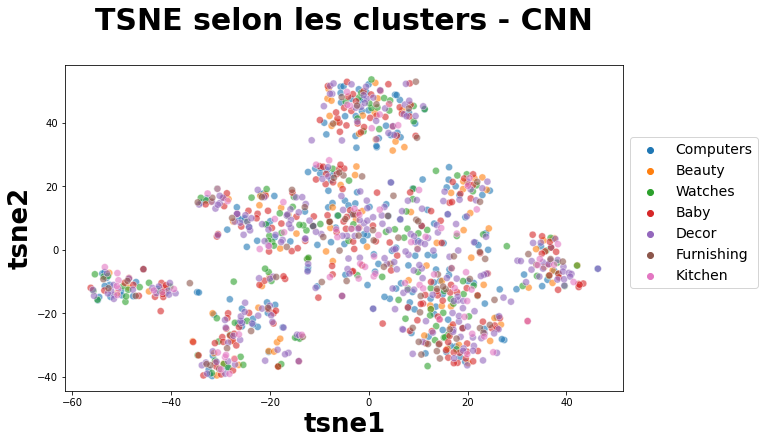

In [420]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="category", data=df_tsne_cnn, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les clusters - CNN', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()

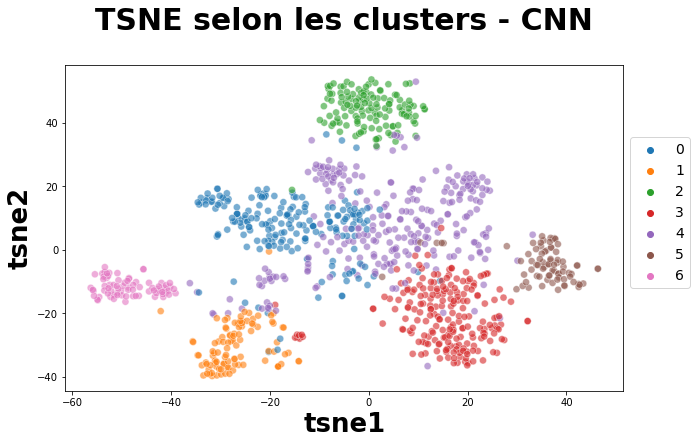

In [421]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels_cnn", data=df_tsne_cnn, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)


plt.title('TSNE selon les clusters - CNN', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor =(1, 0.8)) 

plt.show()